In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import statsmodels.formula.api as smf

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%config InlineBackseend.figure_format = 'retina'
%matplotlib inline
az.style.use('arviz-darkgrid')

In [4]:
# 5.1
d = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/WaffleDivorce.csv',
               sep = ';')

# Standardised Predictors
d['MedianAgeMarriage_s'] = (d.MedianAgeMarriage - d.MedianAgeMarriage.mean())


In [113]:
with pm.Model() as model_5_1:
    a = pm.Normal('a', mu = 10, sd = 10)
    bA = pm.Normal('bA', mu = 0, sd = 1)
    #sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    # good (default) alternatives for sigma (in this and other models) are
    # sigma = pm.HalfNormal('sigma', 5)
    sigma = pm.HalfCauchy('sigma', 5)
    mu = pm.Deterministic('mu', a + bA * d.MedianAgeMarriage_s)
    Divorce = pm.Normal('Divorce', mu = mu, sd = sigma, observed = d.Divorce)
    trace_5_1 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bA, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 2718.74draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


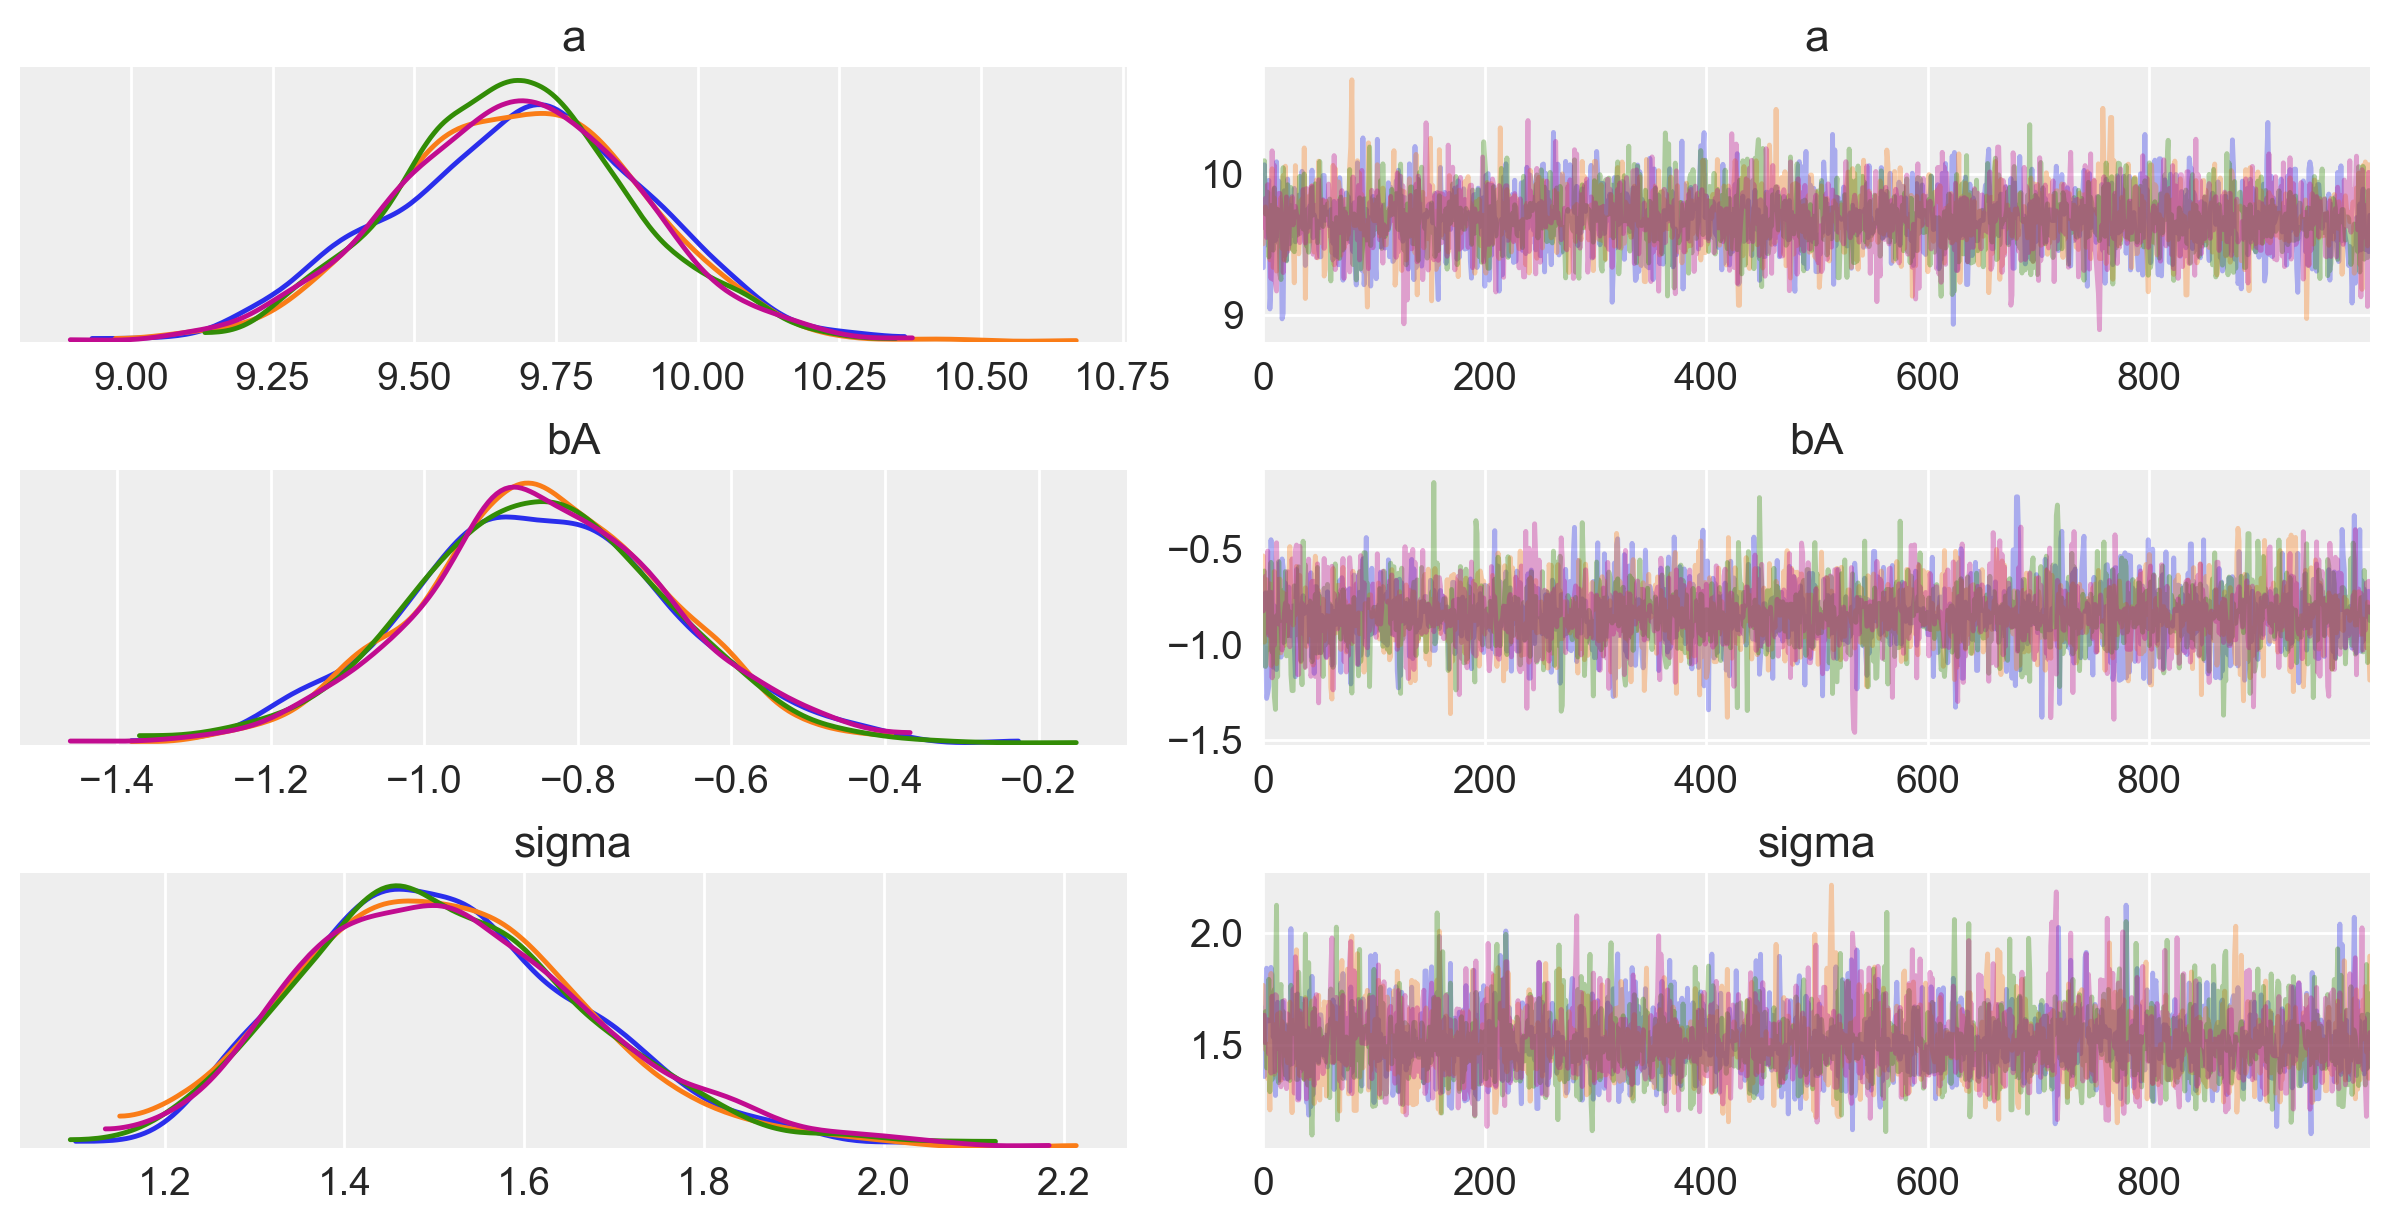

In [114]:
varnames = ['~mu']
az.plot_trace(trace_5_1, varnames);

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


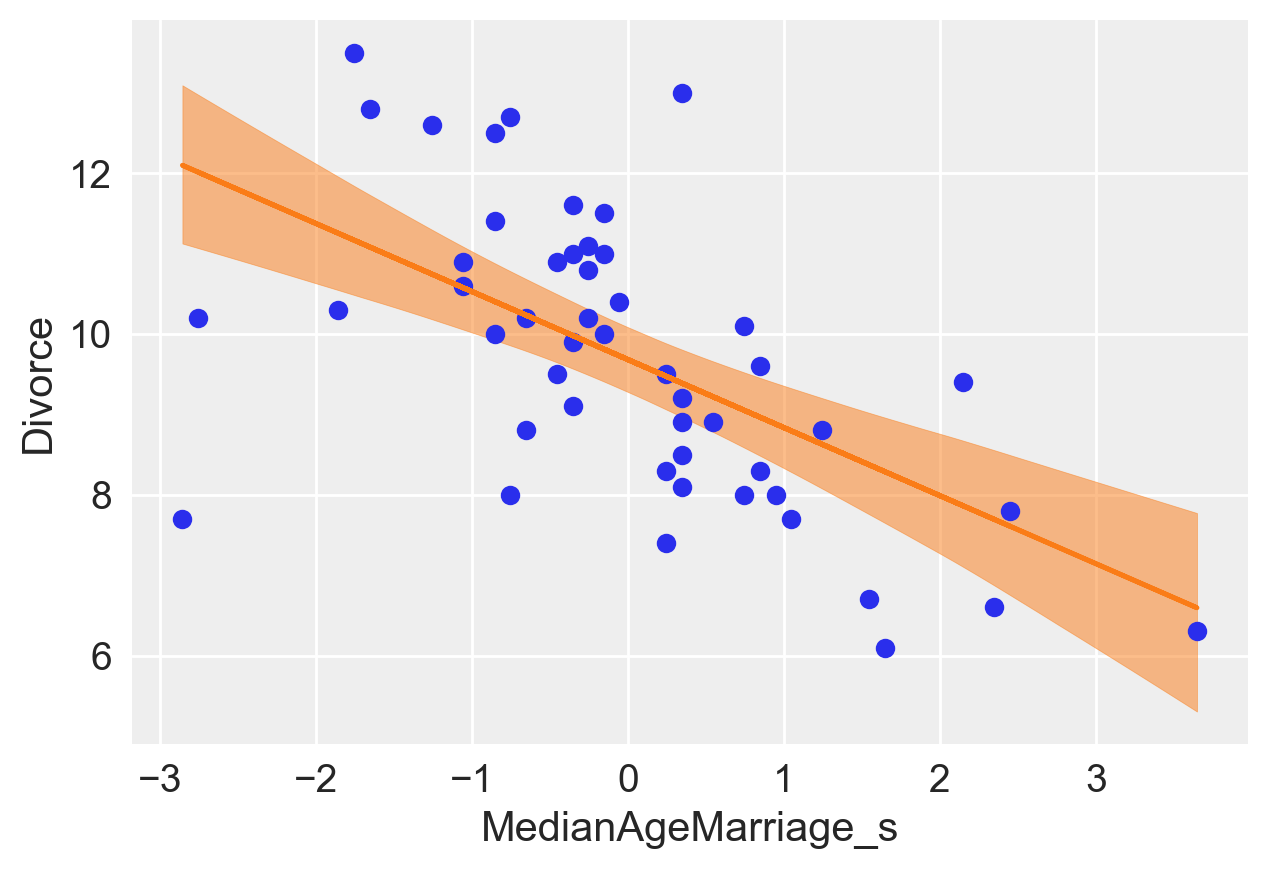

In [115]:
# 5.2
mu_mean = trace_5_1['mu']

plt.plot(d.MedianAgeMarriage_s, d.Divorce, 'C0o')
plt.plot(d.MedianAgeMarriage_s, mu_mean.mean(0), 'C1') # Posterior mean at each value of medianage_s

az.plot_hpd(d.MedianAgeMarriage_s, mu_mean)

plt.xlabel('MedianAgeMarriage_s')
plt.ylabel('Divorce');

In [116]:
# 5.3
d['Marriage_s'] = (d.Marriage - d.Marriage.mean()) / d.Marriage.std()

In [117]:
with pm.Model() as model_5_2:
    a = pm.Normal('a', mu = 10, sd = 10)
    bA = pm.Normal('bA', mu = 0, sd = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + bA * d.Marriage_s)
    Divorce = pm.Normal('Divorce', mu = mu, sd = sigma, observed = d.Divorce)
    trace_5_2 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bA, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3857.78draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


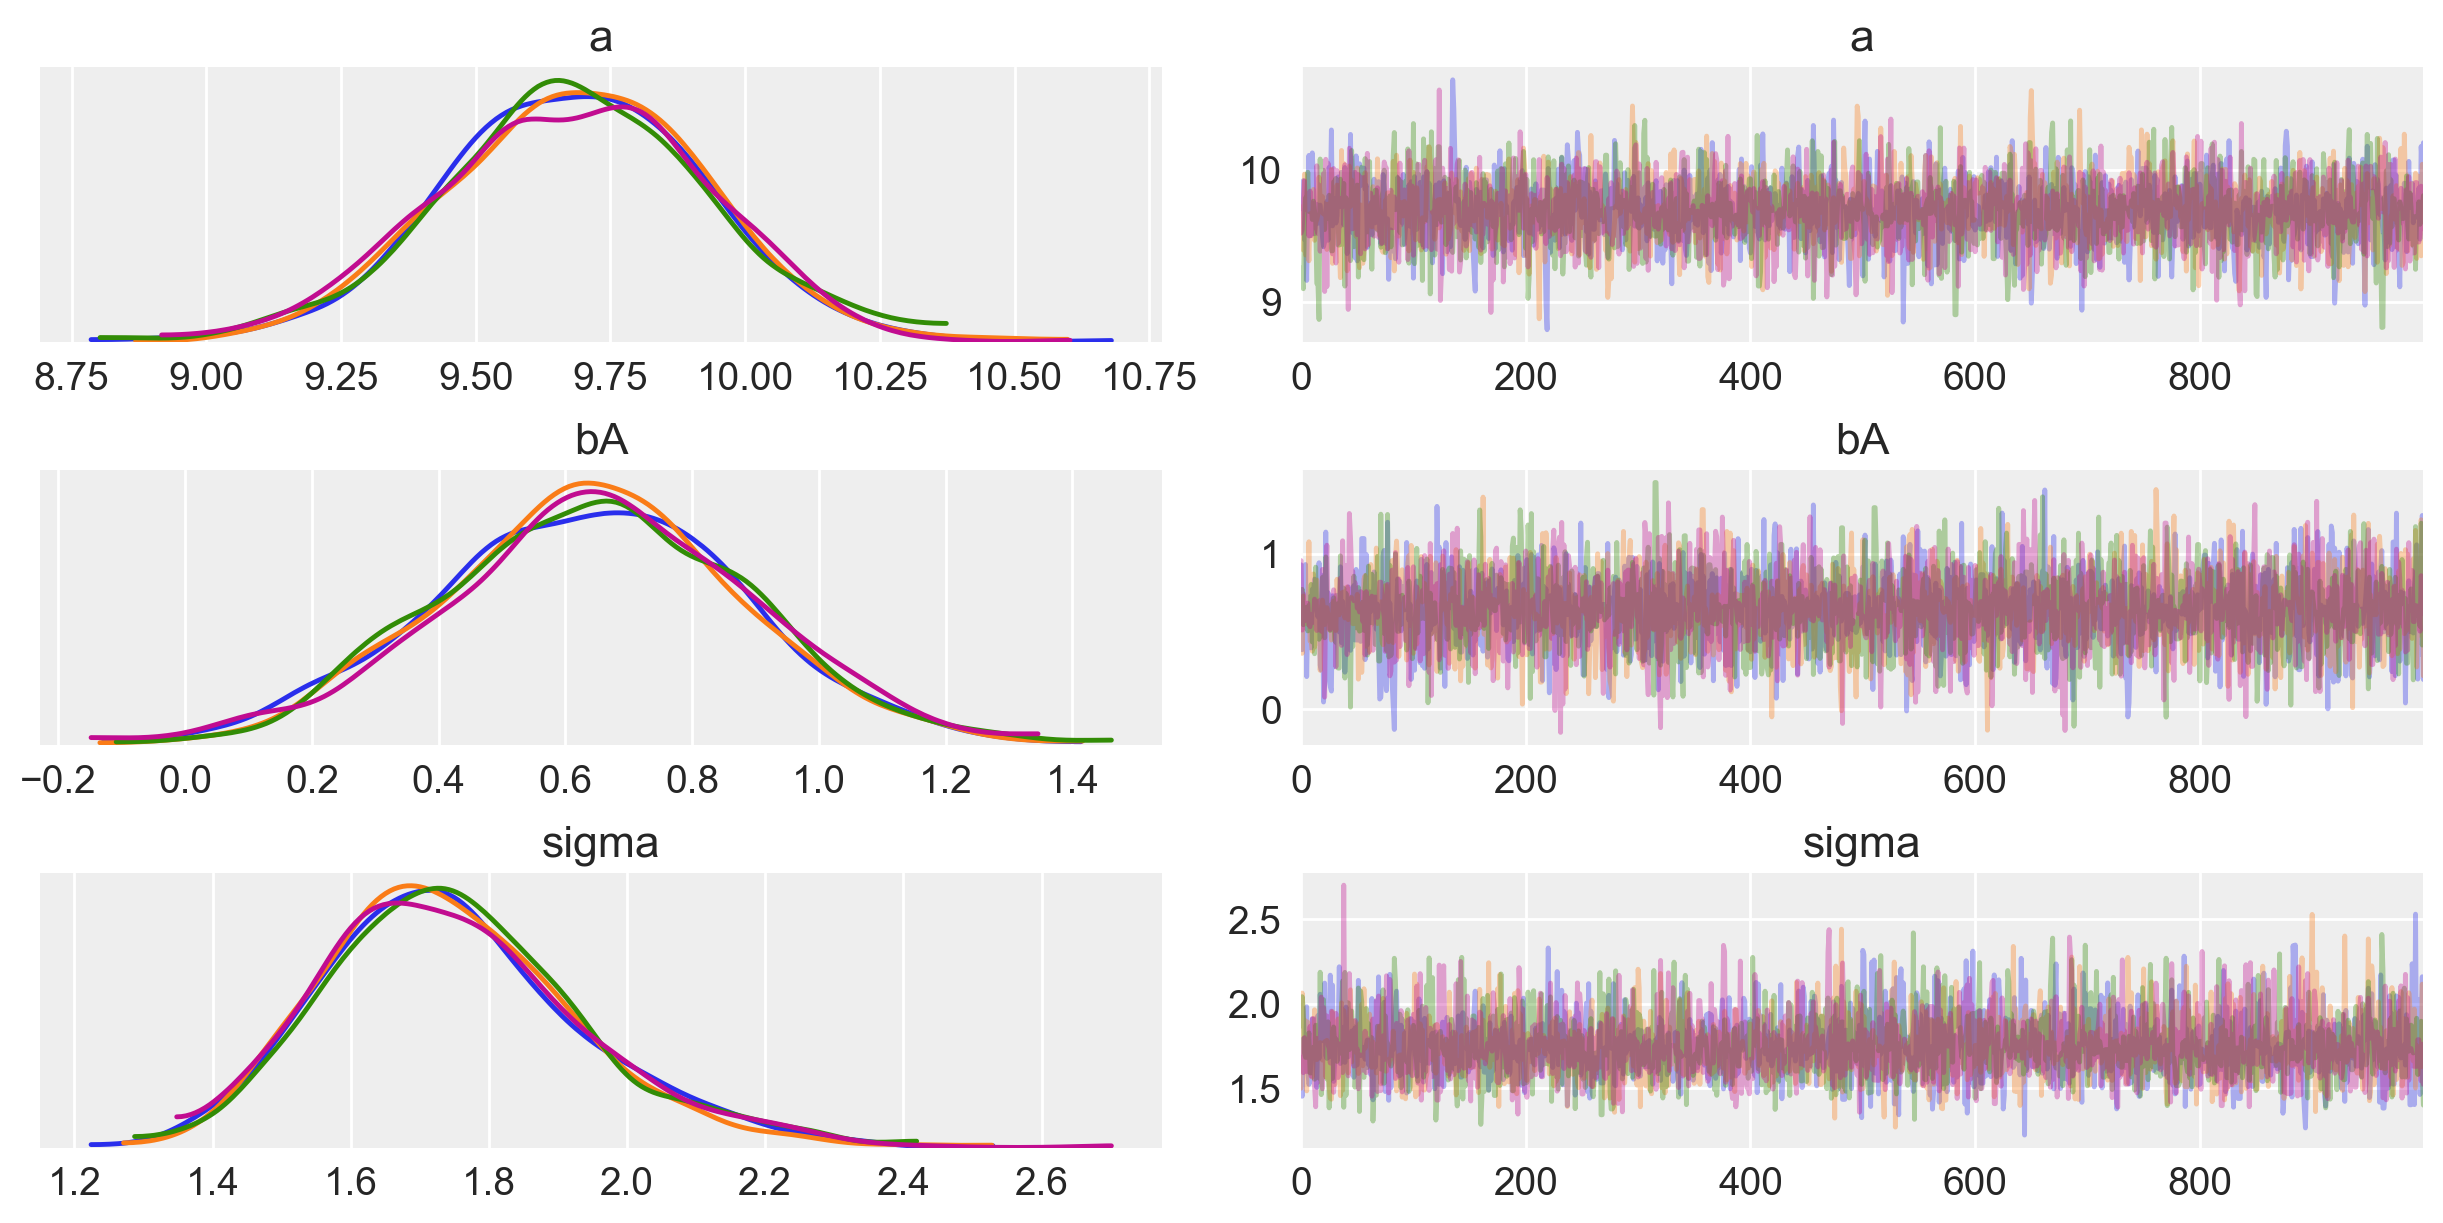

In [118]:
az.plot_trace(trace_5_2, varnames);

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


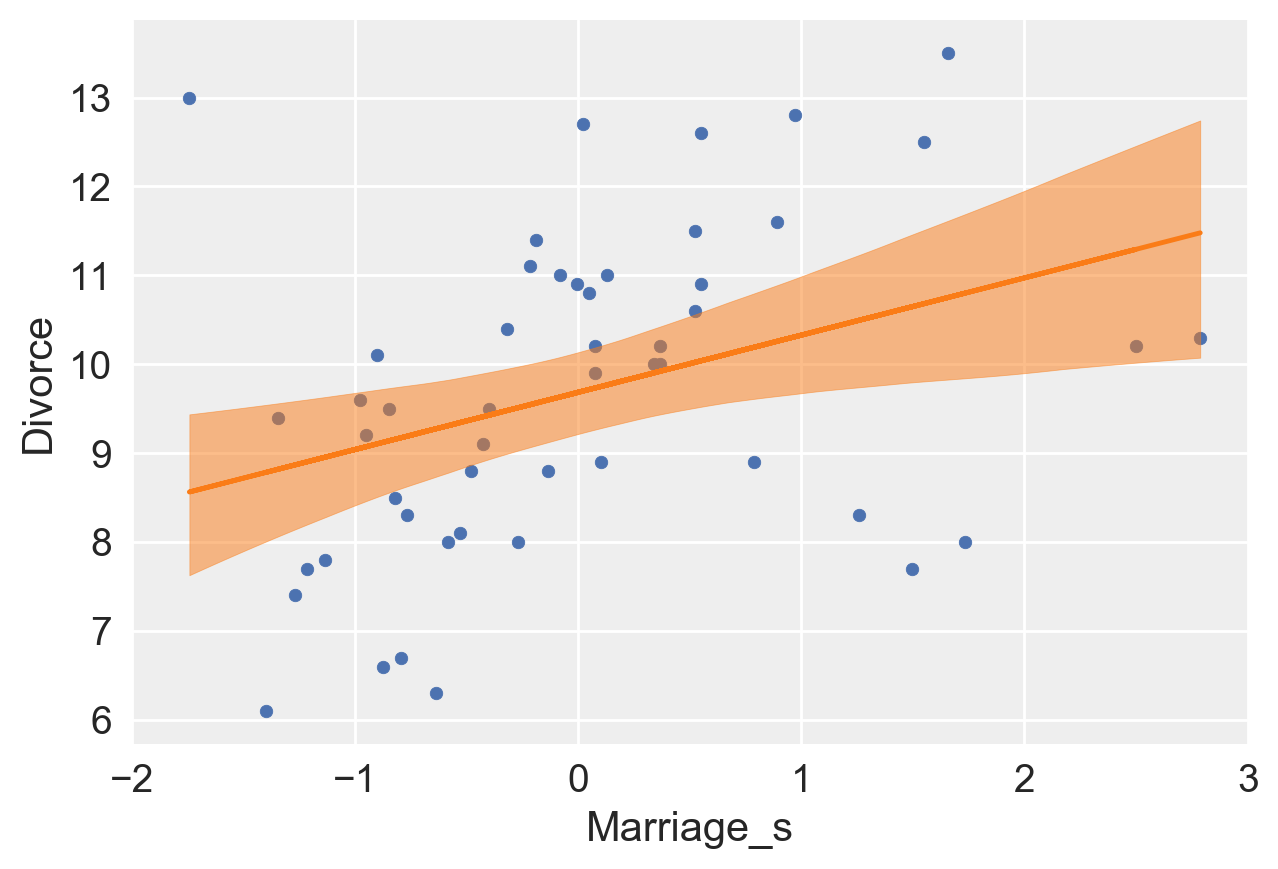

In [119]:
mu_mean = trace_5_2['mu']

d.plot('Marriage_s', 'Divorce', kind = 'scatter', xlim = (-2, 3))
plt.plot(d.Marriage_s, mu_mean.mean(0), 'C1')

az.plot_hpd(d.Marriage_s, mu_mean);

In [146]:
# 5.4
with pm.Model() as model_5_3:
    a = pm.Normal('a', mu = 10, sd = 10)
    bA = pm.Normal('bA', mu = 0, sd = 1, shape = 2)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + bA[0] * d.Marriage_s + bA[1]* d.MedianAgeMarriage_s)
    
    Divorce = pm.Normal('Divorce', mu = mu, sd = sigma, observed = d.Divorce)
    trace_5_3 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bA, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 2675.17draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


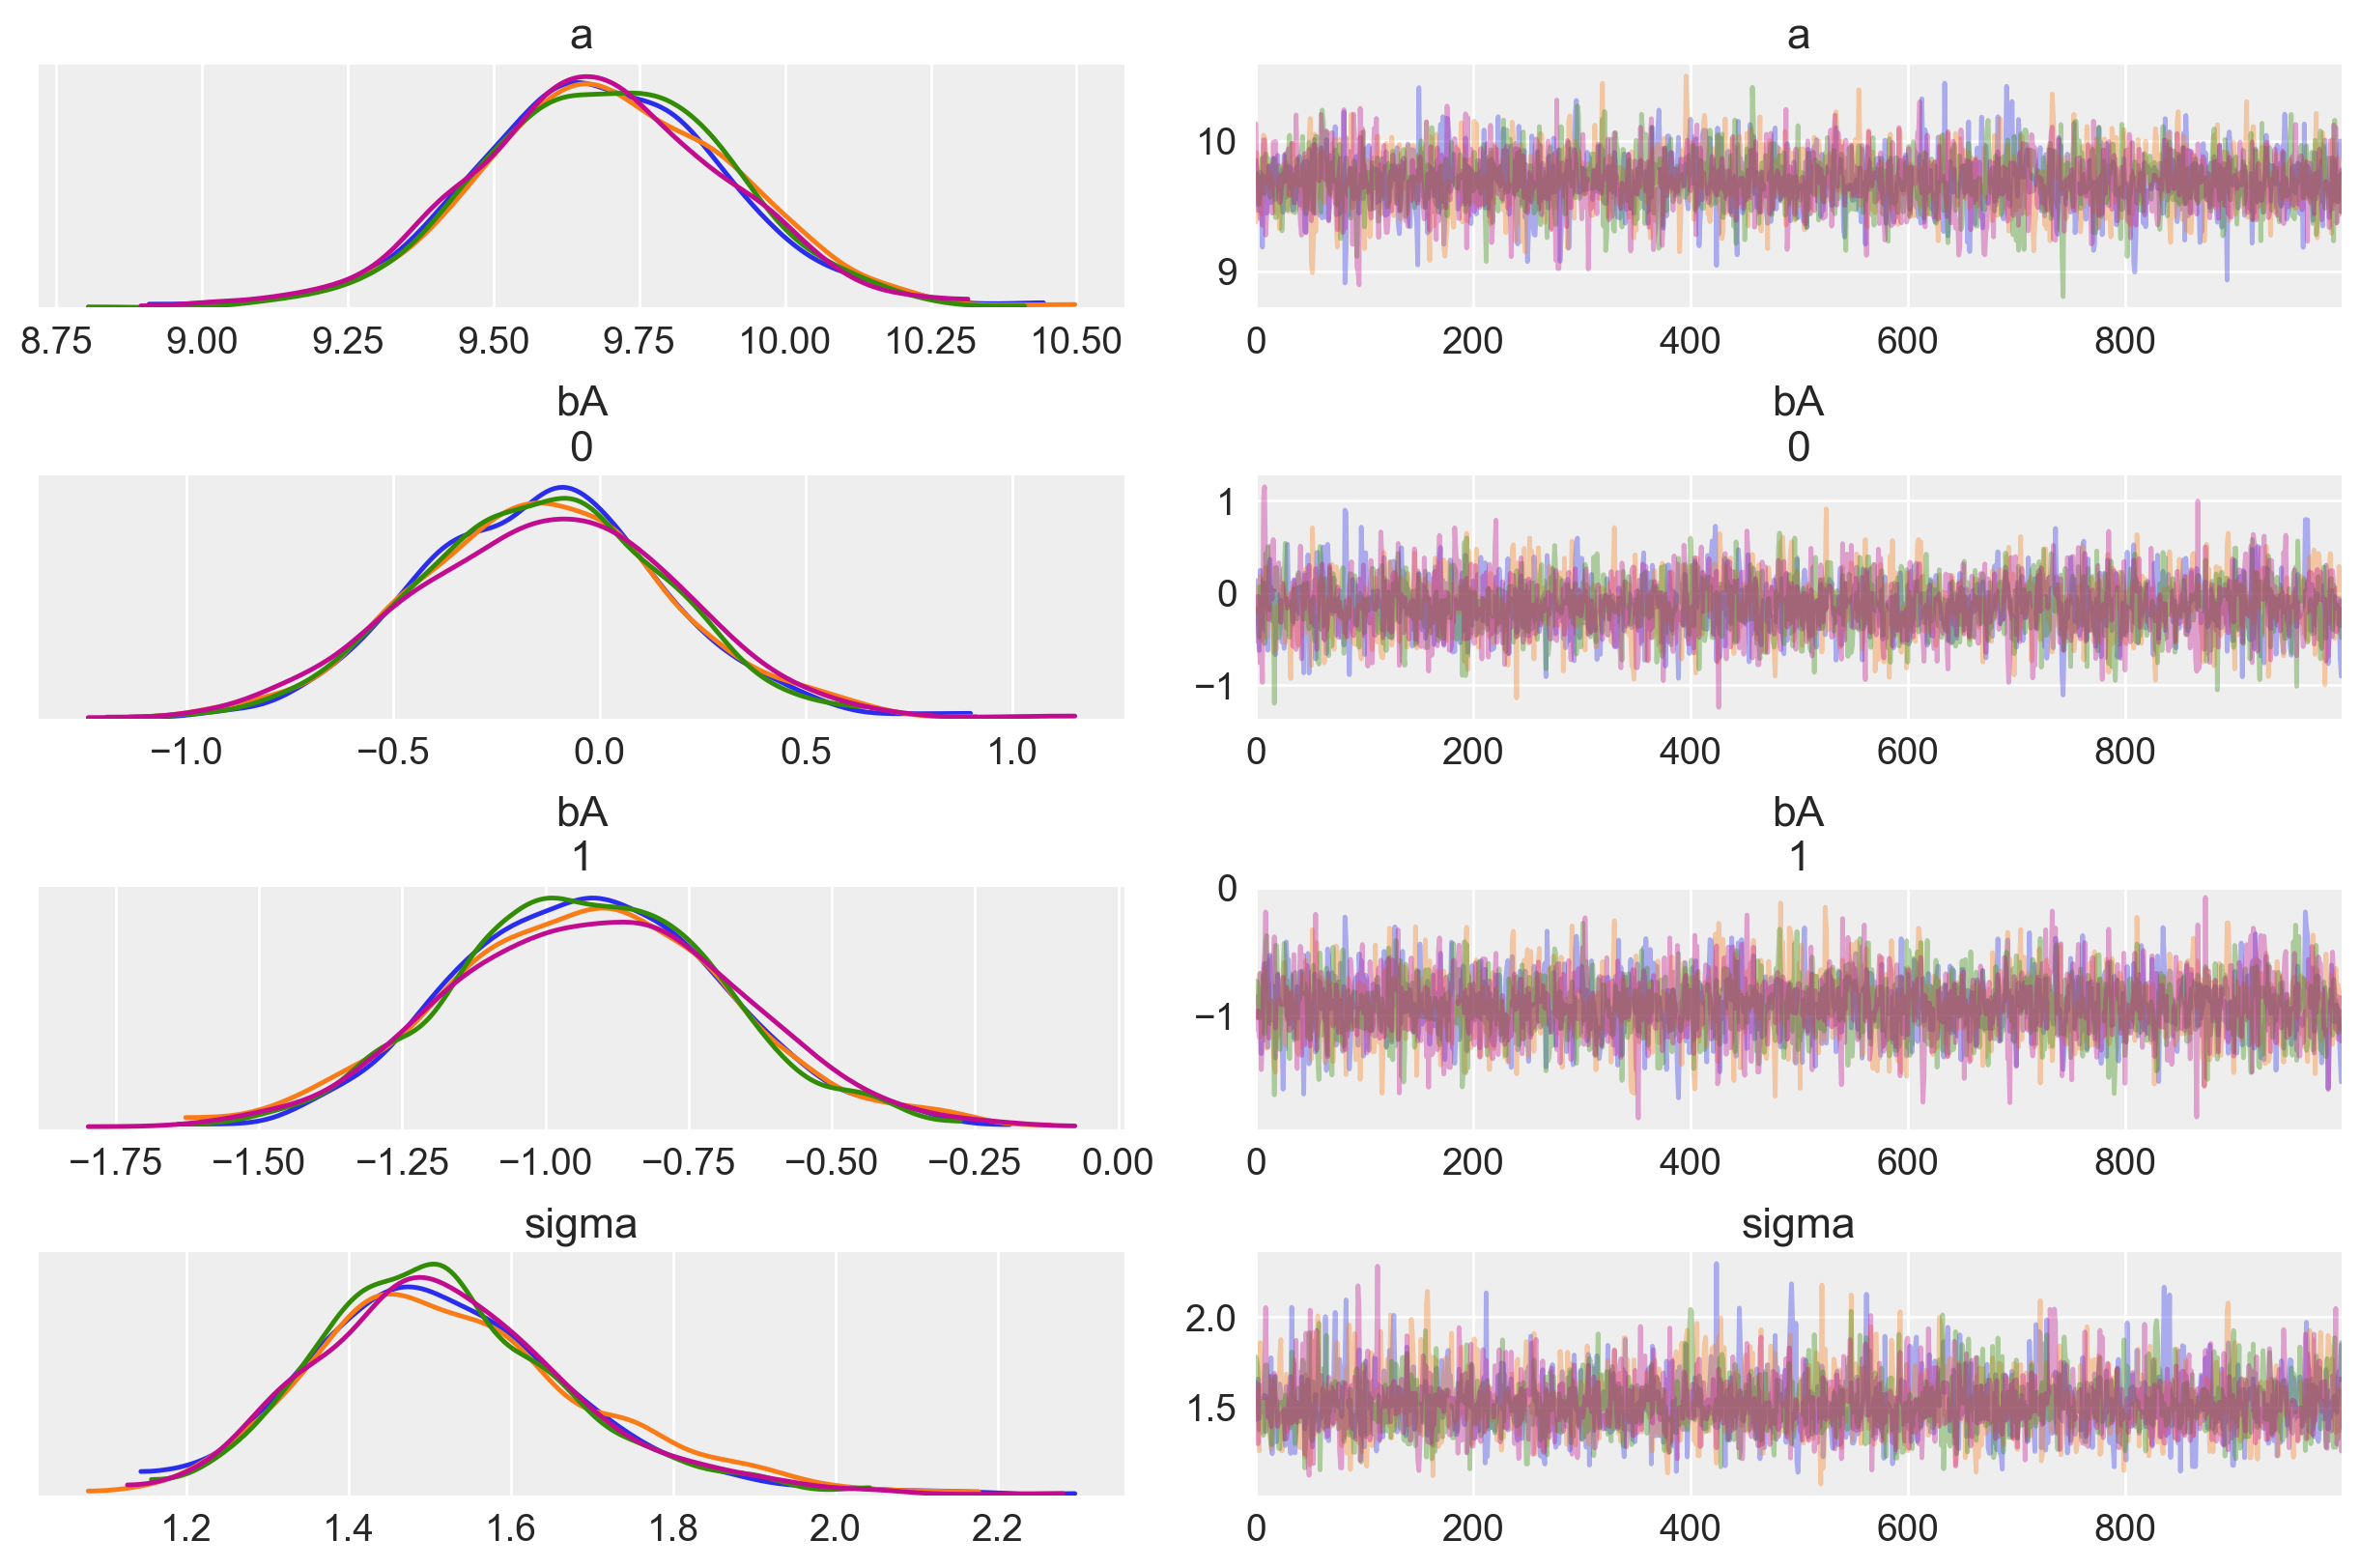

In [147]:
az.plot_trace(trace_5_3, varnames);

In [143]:
az.summary(trace_5_3, varnames, credible_interval=.11).round(3)

mean     sd  hpd_44.5%  hpd_55.5%  mcse_mean  mcse_sd  ess_mean  \
a      9.714  1.559      9.074      9.468      0.036    0.026    1866.0   
bA[0] -0.017  0.995      0.061      0.324      0.023    0.018    1872.0   
bA[1] -0.846  0.177     -0.859     -0.811      0.003    0.002    2628.0   
sigma  1.516  0.162      1.459      1.499      0.004    0.003    2004.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1866.0    1871.0    1723.0    1.0  
bA[0]  1538.0    1875.0    1787.0    1.0  
bA[1]  2552.0    2646.0    1825.0    1.0  
sigma  2004.0    1912.0    1207.0    1.0

(<Figure size 600x760 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ed986a0>],
       dtype=object))

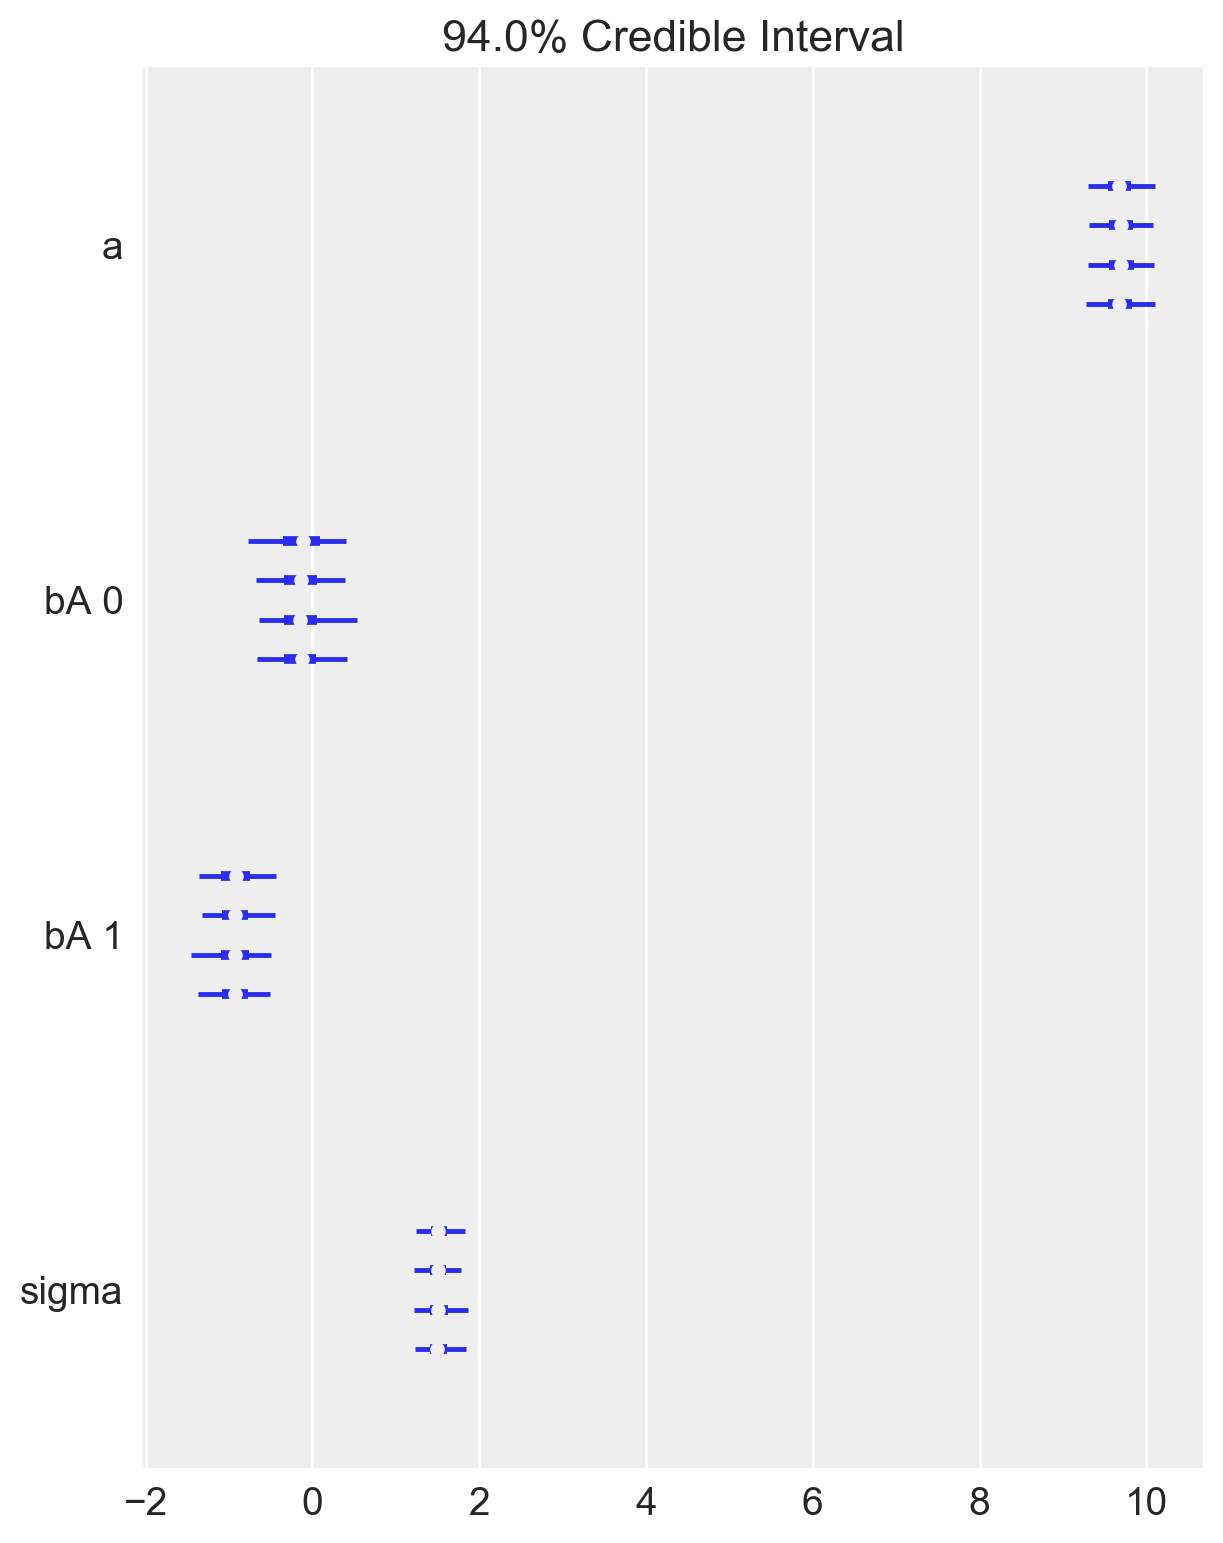

In [148]:
# 5.5
pm.forestplot(trace_5_3, var_names = varnames)

In [136]:
# 5.6
with pm.Model() as model_5_4:
    a = pm.Normal('a', mu = 10, sd = 10)
    b = pm.Normal('b', mu = 0, sd = 1)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    mu = pm.Deterministic('mu', a + b * d.MedianAgeMarriage_s)
    Marriage = pm.Normal('Marriage', mu = mu, sd = sigma, observed = d.Marriage_s)
    trace_5_4 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3300.99draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


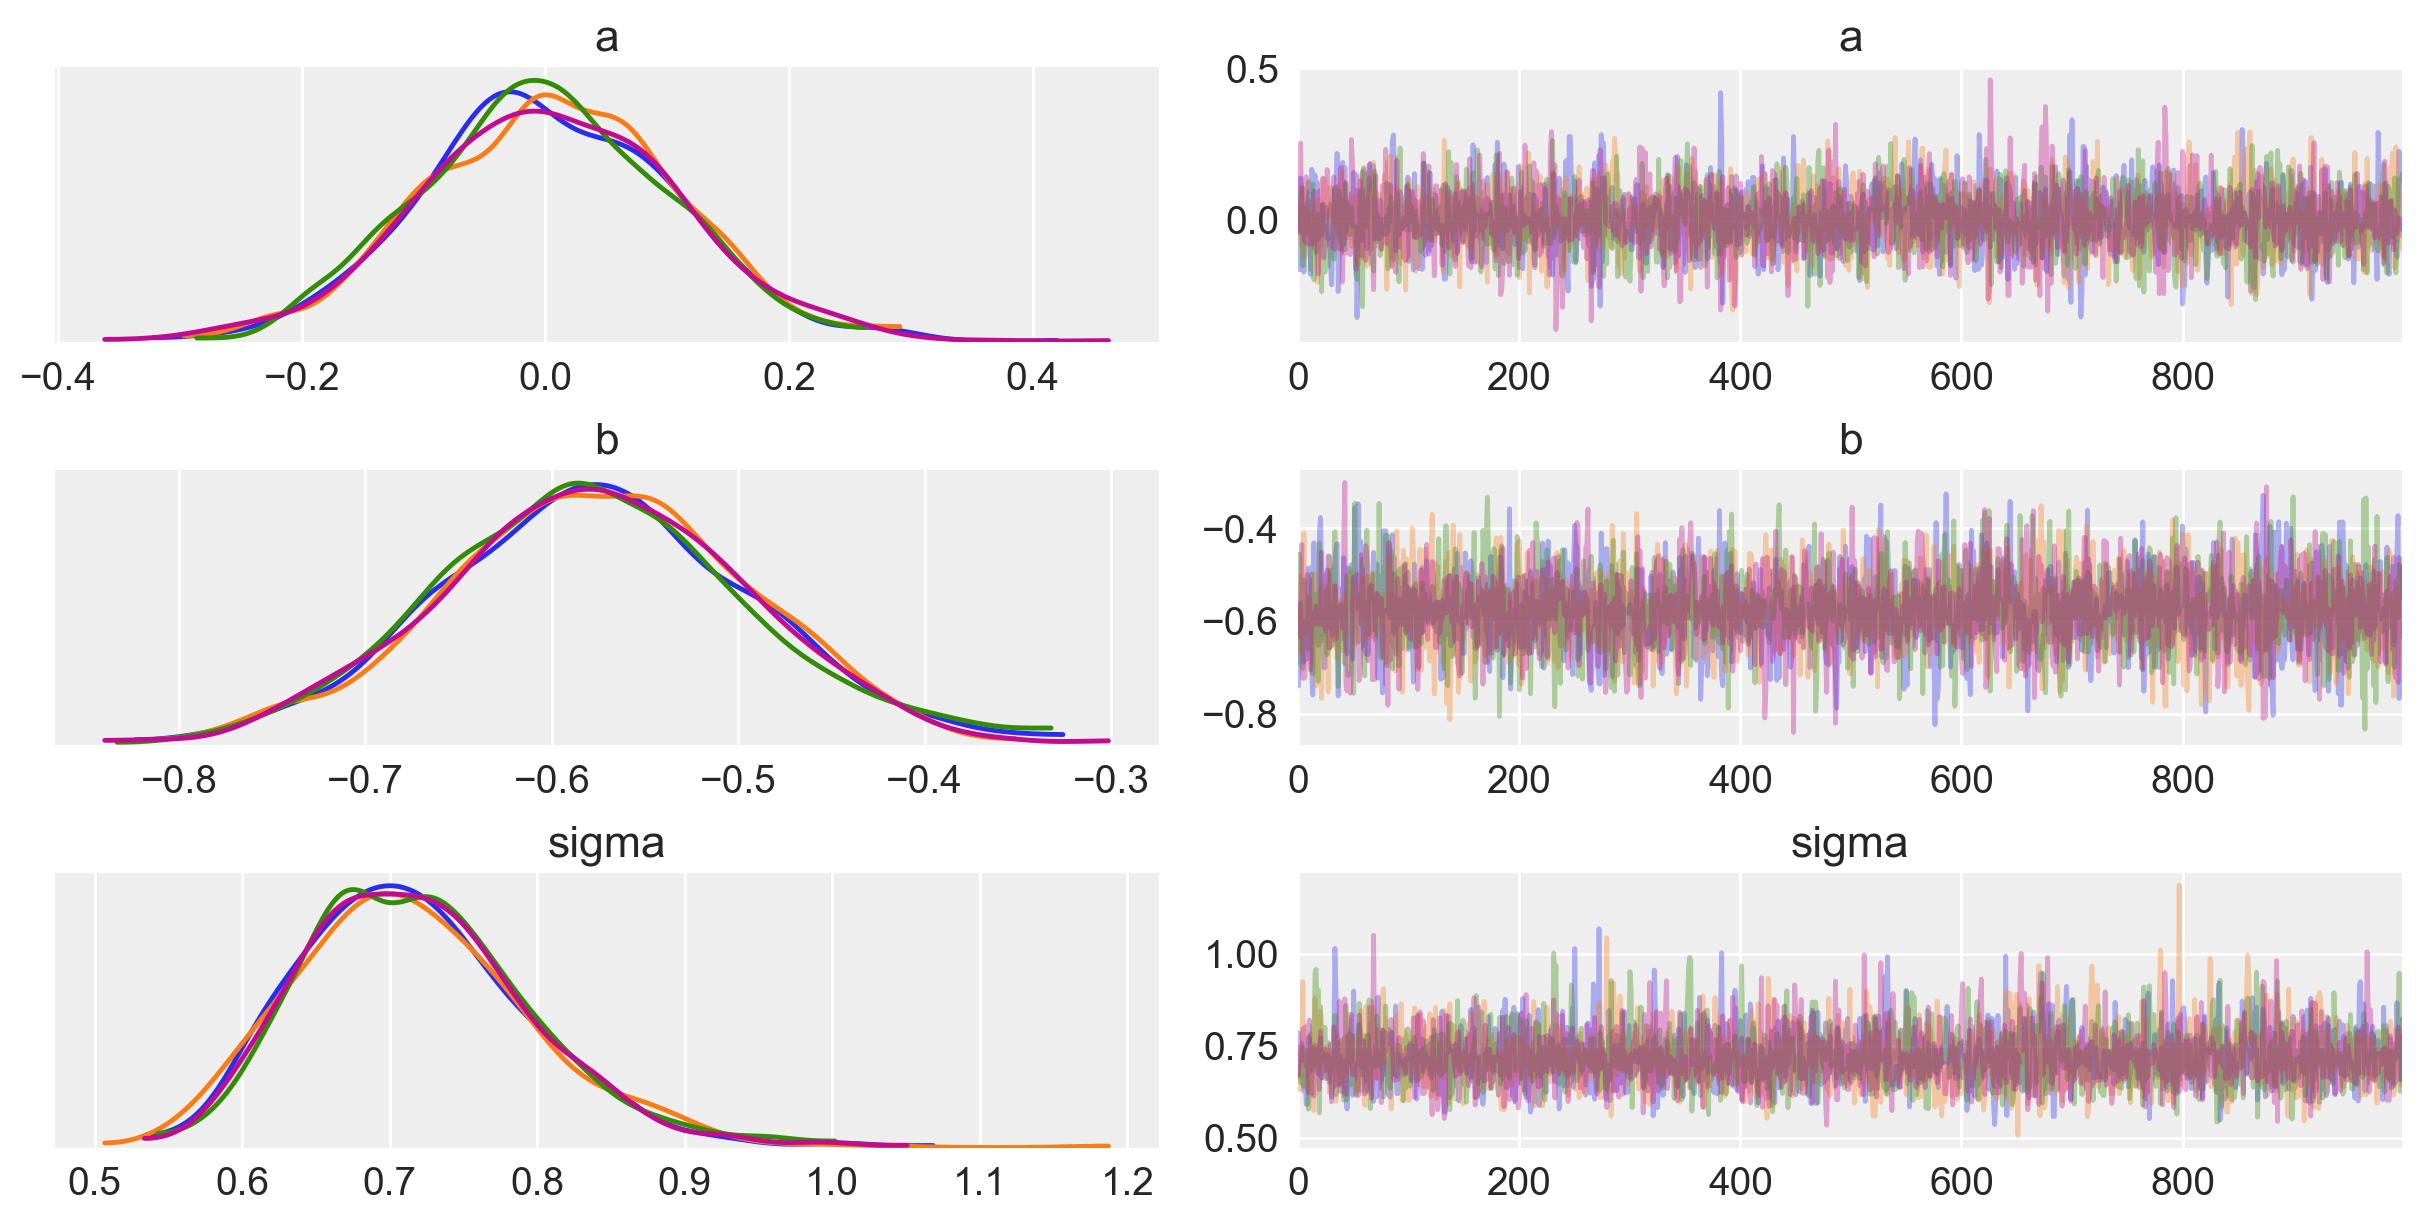

In [132]:
pm.traceplot(trace_5_4, varnames);

In [137]:
# 5.7 
mu_pred = trace_5_4['mu'].mean(0)
residuals = d.Marriage_s - mu_pred

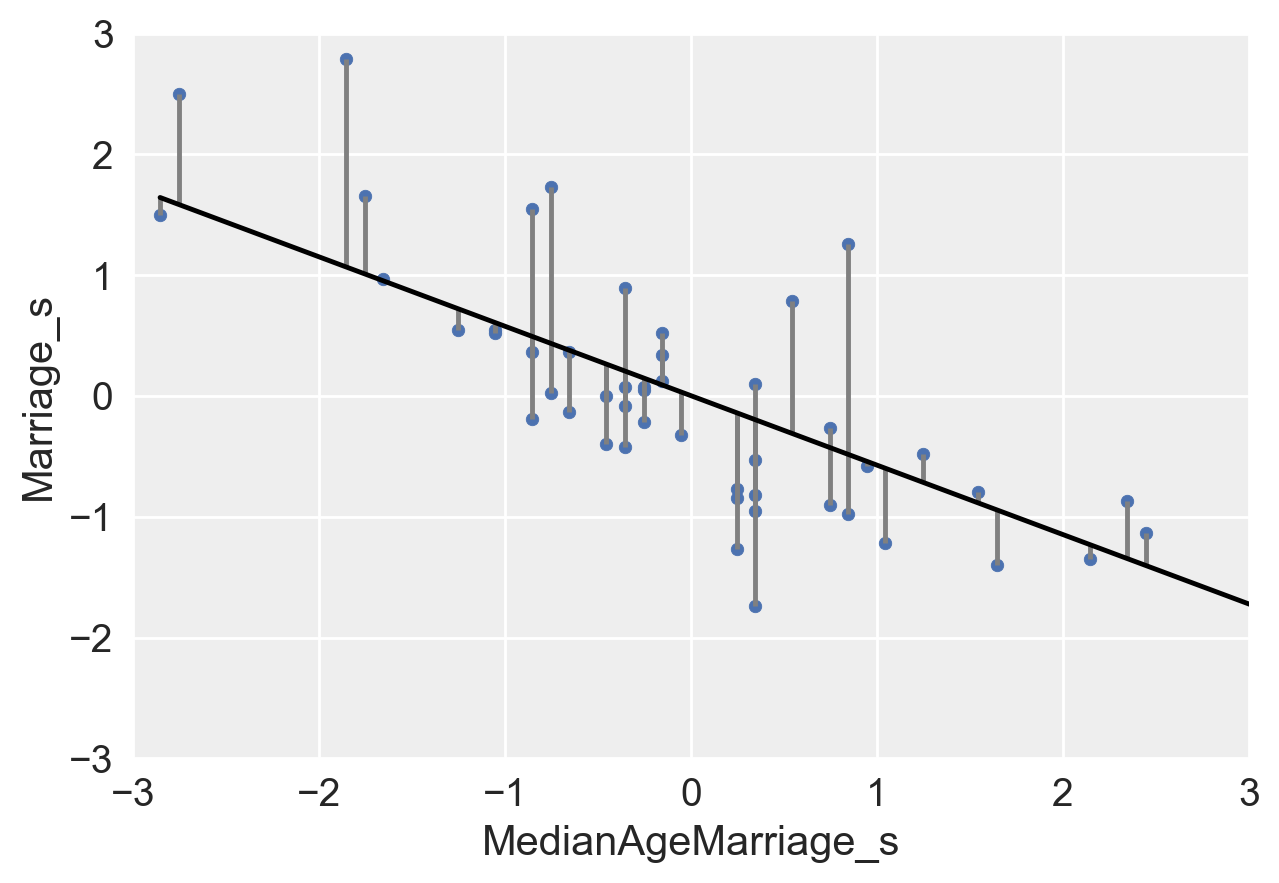

In [138]:
# 5.8
idx = np.argsort(d.MedianAgeMarriage_s)
d.plot('MedianAgeMarriage_s', 'Marriage_s', kind = 'scatter', xlim = (-3, 3), ylim = (-3, 3))
plt.plot(d.MedianAgeMarriage_s[idx], mu_pred[idx], 'k')
plt.vlines(d.MedianAgeMarriage_s, mu_pred, mu_pred + residuals, colors = 'grey');

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


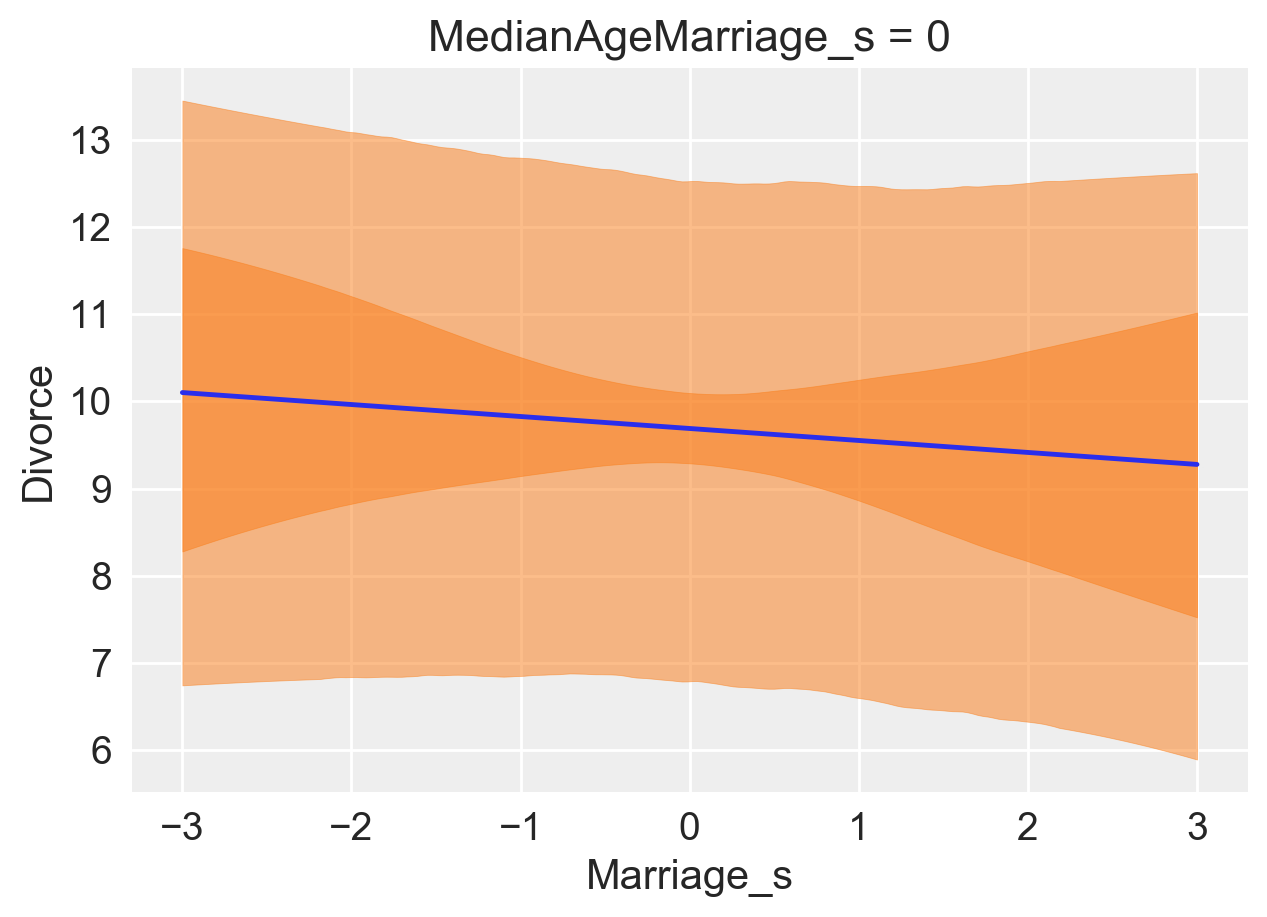

In [149]:
# 5.9
R_avg = np.linspace(-3, 3, 100)

mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,0] * R_avg[:, None]
divorce_ = stats.norm.rvs(mu_pred, trace_5_3['sigma'])

plt.plot(R_avg, mu_pred.mean(1), 'C0')
az.plot_hpd(R_avg, mu_pred.T)
az.plot_hpd(R_avg, divorce_.T)

plt.xlabel('Marriage_s')
plt.ylabel('Divorce')
plt.title('MedianAgeMarriage_s = 0');

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


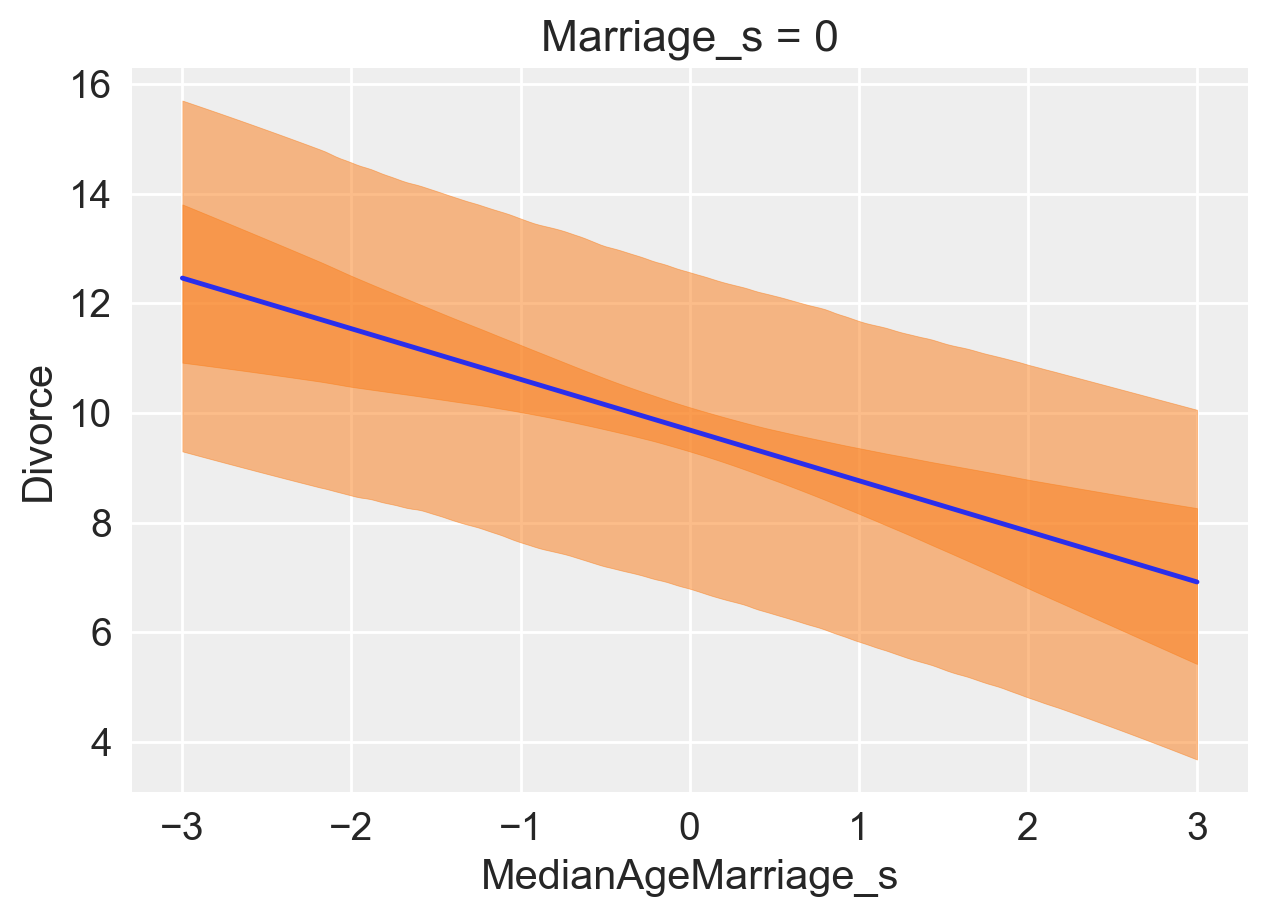

In [150]:
# 5.10
R_avg = np.linspace(-3, 3, 100)

mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,1] * R_avg[:,None]
divorce_ = stats.norm.rvs(mu_pred, trace_5_3['sigma'])

plt.plot(R_avg, mu_pred.mean(1), 'C0')
az.plot_hpd(R_avg, mu_pred.T)
az.plot_hpd(R_avg, divorce_.T)

plt.xlabel('MedianAgeMarriage_s')
plt.ylabel('Divorce')
plt.title('Marriage_s = 0');

In [154]:
# 5.11
mu_pred = trace_5_3['mu']

divorce_pred = pm.sample_posterior_predictive(trace_5_3, samples = 1000, model = model_5_3)['Divorce']
divorce_hpd = pm.hpd(divorce_pred)

100%|██████████| 1000/1000 [00:00<00:00, 1000.17it/s]


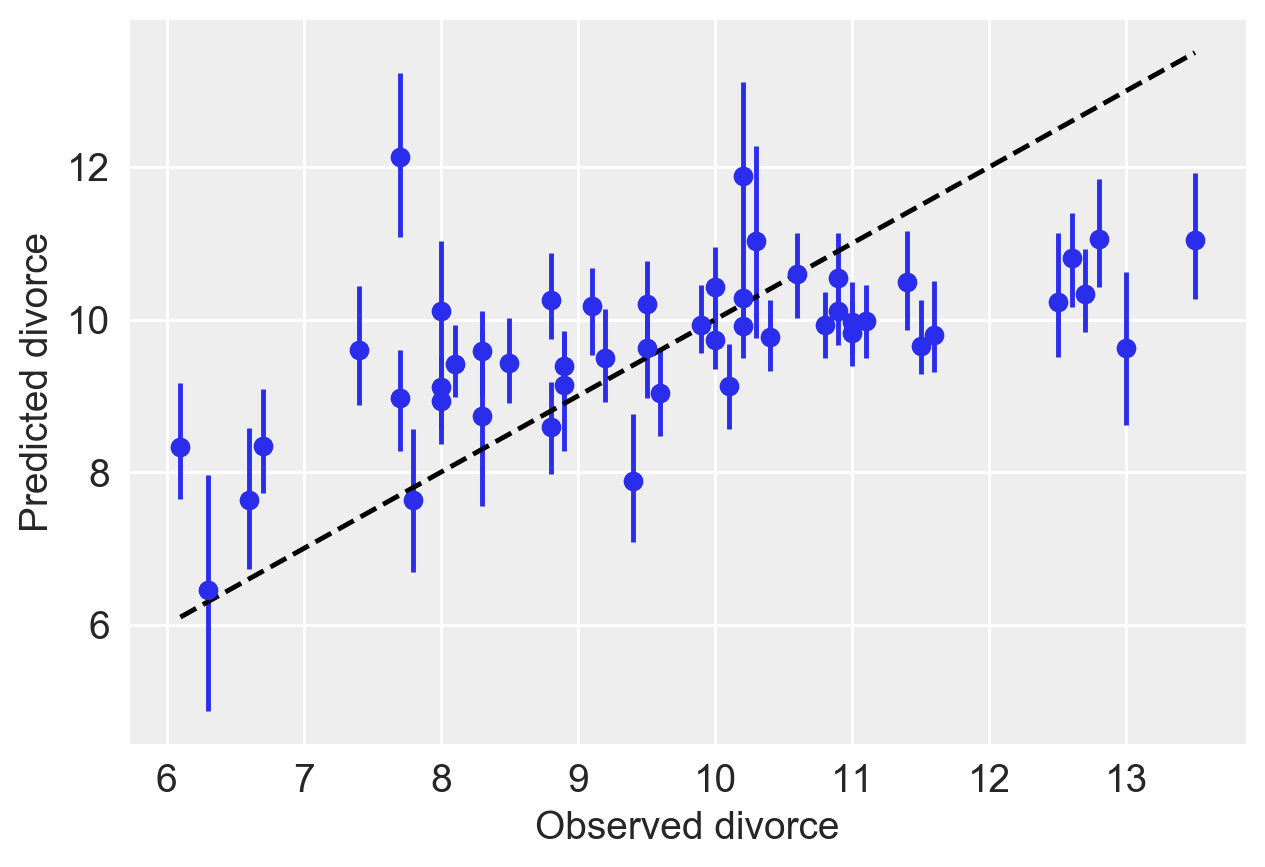

In [164]:
#5.12
mu_hpd = az.hpd(mu_pred, credible_interval=0.95)
plt.errorbar(d.Divorce, divorce_pred.mean(0), yerr=np.abs(divorce_pred.mean(0)-mu_hpd.T) , fmt='C0o')
plt.plot(d.Divorce, divorce_pred.mean(0), 'C0o')

plt.xlabel('Observed divorce', fontsize=14)
plt.ylabel('Predicted divorce', fontsize=14)

min_x, max_x = d.Divorce.min(), d.Divorce.max()
plt.plot([min_x, max_x], [min_x, max_x], 'k--');

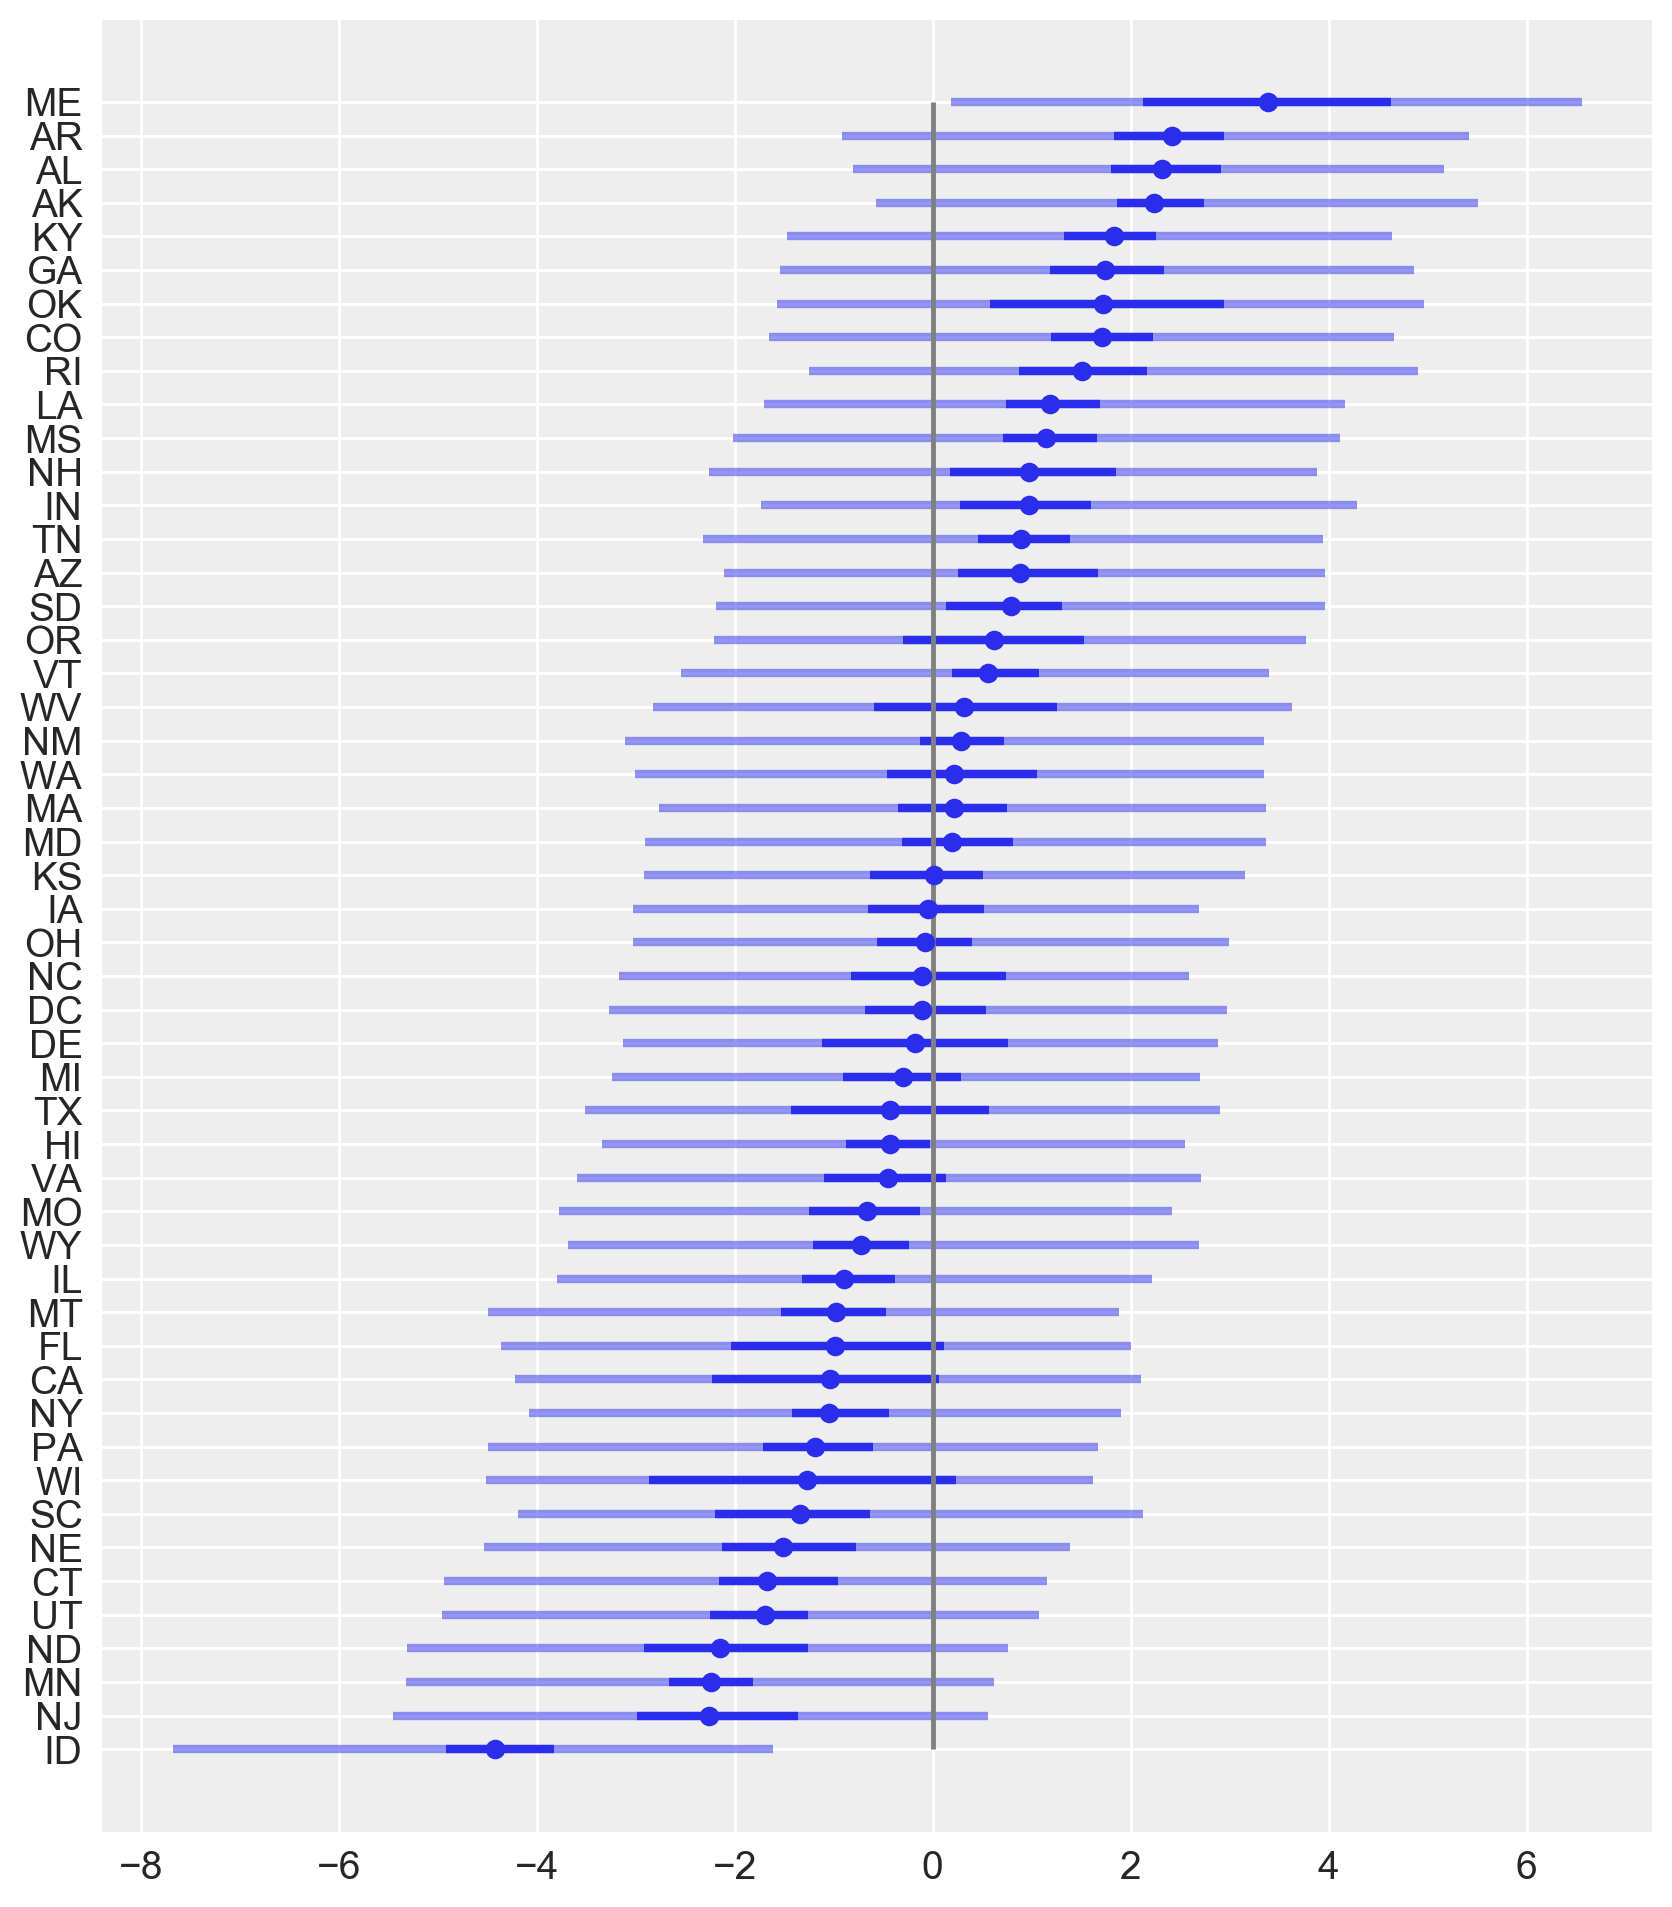

In [165]:
# 5.14
plt.figure(figsize=(10,12))
residuals = d.Divorce - mu_pred.mean(0)
idx = np.argsort(residuals)
y_label = d.Loc[idx]
y_points = np.linspace(0, 1, 50)
plt.errorbar(residuals[idx], y_points, 
             xerr=np.abs(divorce_pred.mean(0)-mu_hpd.T),
             fmt='C0o',lw=3)

plt.errorbar(residuals[idx], y_points, 
             xerr=np.abs(divorce_pred.mean(0)-divorce_hpd.T),
             fmt='C0o', lw=3, alpha=0.5)

plt.yticks(y_points, y_label);
plt.vlines(0, 0, 1, 'grey');

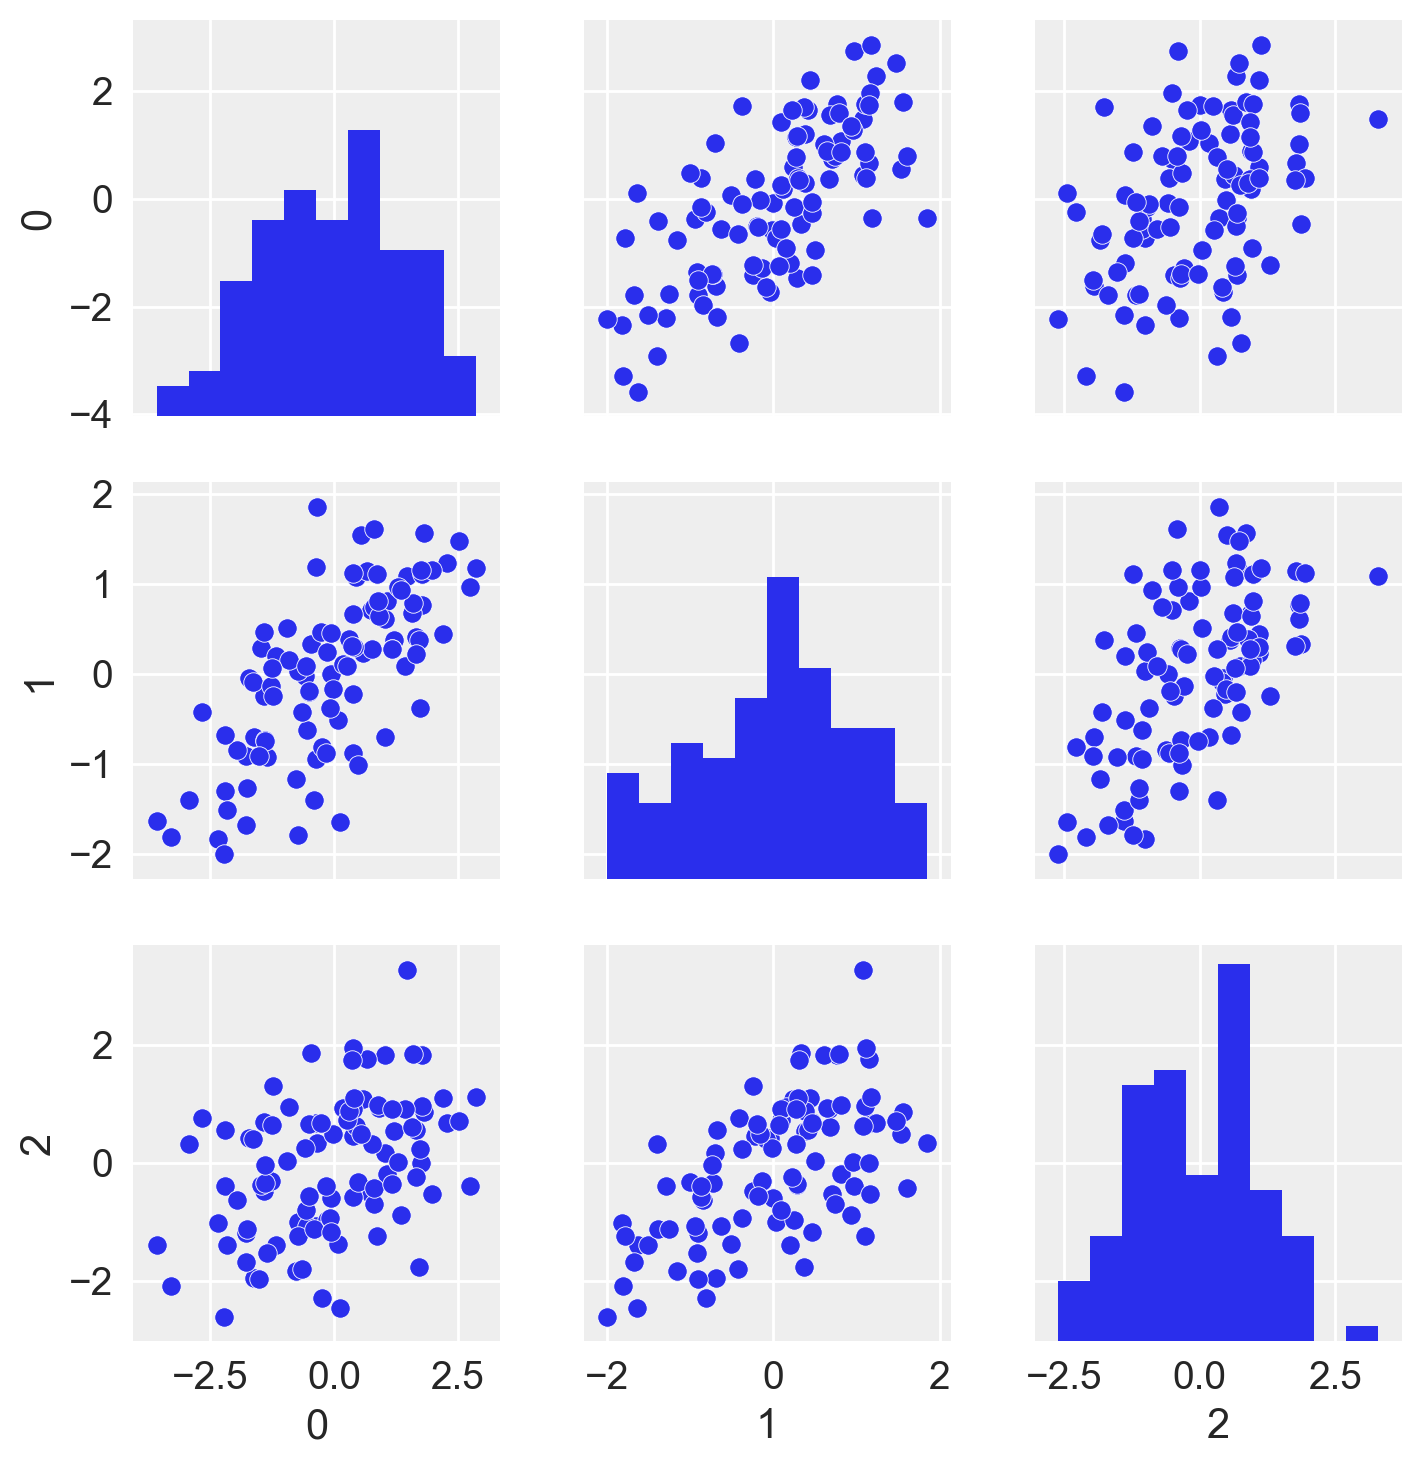

In [179]:
# 5.15 Simulating a spurious relationship
N = 100
x_real = stats.norm.rvs(size = N)
x_spur = stats.norm.rvs(x_real)
y = stats.norm.rvs(x_real)
d = pd.DataFrame([y, x_real, x_spur]).T

sns.pairplot(d);

In [5]:
# 5.16
d = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/milk.csv', sep=';')
d.head()

clade         species  kcal.per.g  perc.fat  perc.protein  \
0  Strepsirrhine  Eulemur fulvus        0.49     16.60         15.42   
1  Strepsirrhine        E macaco        0.51     19.27         16.91   
2  Strepsirrhine        E mongoz        0.46     14.11         16.85   
3  Strepsirrhine   E rubriventer        0.48     14.91         13.18   
4  Strepsirrhine     Lemur catta        0.60     27.28         19.50   

   perc.lactose  mass  neocortex.perc  
0         67.98  1.95           55.16  
1         63.82  2.09             NaN  
2         69.04  2.51             NaN  
3         71.91  1.62             NaN  
4         53.22  2.19             NaN

In [8]:
# 5.17 - 5.20
dcc = d.dropna().copy()

In [210]:
with pm.Model() as model_5_5:
    a = pm.Normal('a', mu=10, sd=100)
    bn = pm.Normal('bn', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + bn * dcc['neocortex.perc'])
    kcal = pm.Normal('kcal', mu=mu, sd=sigma, observed=dcc['kcal.per.g'])
    trace_5_5 = pm.sample(1000, tune=1000, chains = 2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, bn, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:11<00:00, 360.84draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the 

In [211]:
pm.traceplot(model_5_5, varnames);

ValueError: Can only convert xarray dataset, dict, netcdf file, numpy array, pystan fit, pymc3 trace, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv, cmdstanpy fit to InferenceData, not Model

In [208]:
# 5.21
az.summary(trace_5_5, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      0.318  0.562    -0.728      1.165      0.042    0.030     180.0   
bn     0.005  0.008    -0.010      0.018      0.001    0.000     182.0   
sigma  0.192  0.039     0.135      0.255      0.005    0.003      73.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a       180.0     189.0     152.0   1.02  
bn      182.0     191.0     136.0   1.02  
sigma    73.0      59.0      37.0   1.04

In [212]:
#5.22
trace_5_5['bn'].mean() * (76 - 55)

0.09039140029866134

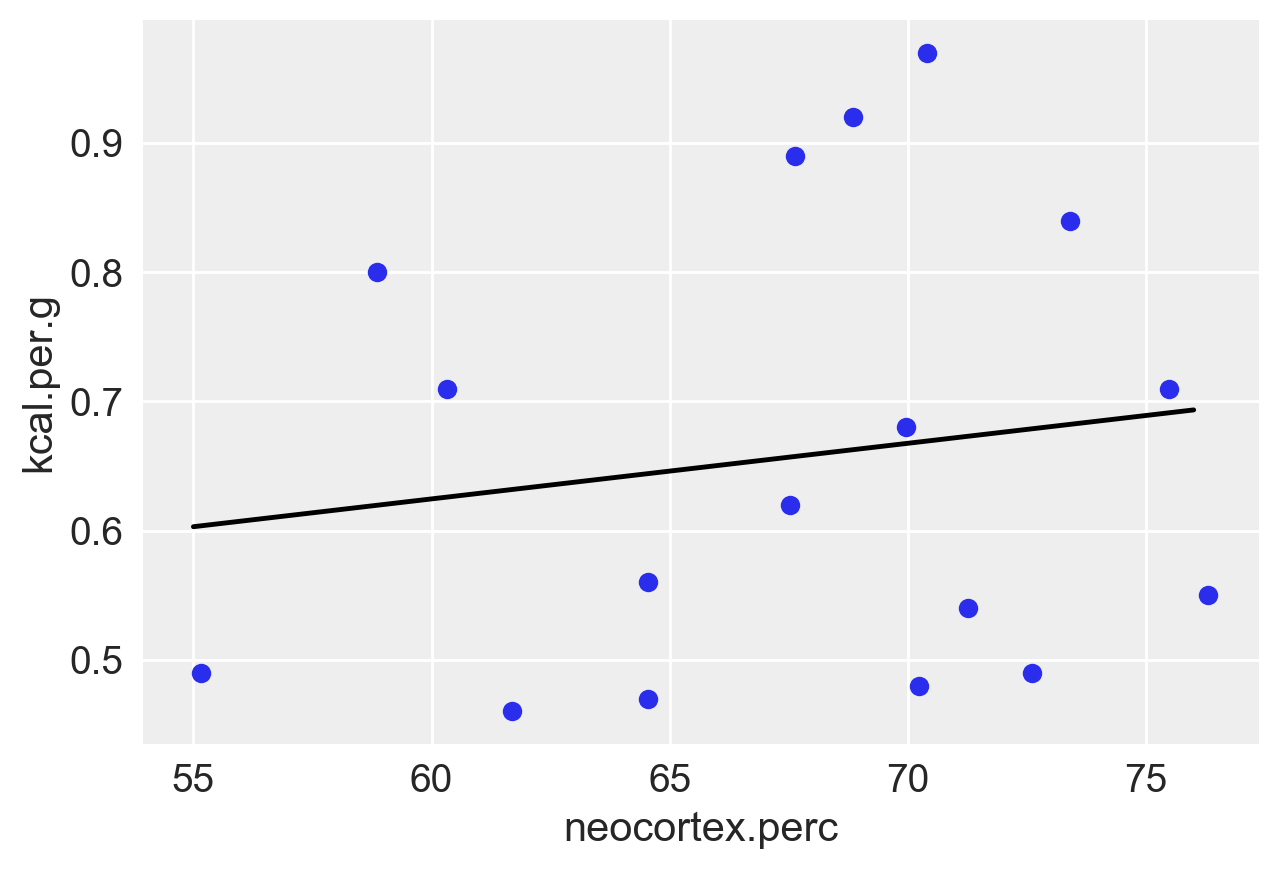

In [214]:
# 5.23
seq = np.linspace(55, 76, 50)
mu_pred = trace_5_5['a'] + trace_5_5['bn'] * seq[:,None]

plt.plot(d['neocortex.perc'], d['kcal.per.g'], 'C0o')

plt.plot(seq, mu_pred.mean(1), 'k')
az.plot_hpd(seq, mu_pred.T,
            fill_kwargs={'alpha': 0},
            plot_kwargs={'alpha':1, 'color':'k', 'ls':'--'})

plt.xlabel('neocortex.perc')
plt.ylabel('kcal.per.g');

In [9]:
# 5.24
dcc['log_mass'] = np.log(dcc['mass'])

In [218]:
with pm.Model() as model_5_6:
    a = pm.Normal('a', mu=10, sd=100)
    bn = pm.Normal('bn', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + bn * dcc['log_mass'])
    kcal = pm.Normal('kcal', mu=mu, sd=sigma, observed=dcc['kcal.per.g'])
    trace_5_6 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bn, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2605.30draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [219]:
az.summary(trace_5_6, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      0.704  0.058     0.614      0.799      0.001    0.001    1933.0   
bn    -0.031  0.025    -0.071      0.008      0.001    0.000    1927.0   
sigma  0.184  0.039     0.125      0.237      0.001    0.001    1886.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1933.0    1942.0    2415.0    1.0  
bn     1789.0    1958.0    1723.0    1.0  
sigma  1776.0    2014.0    2128.0    1.0

In [10]:
# 5.26
with pm.Model() as model_5_7:
    a = pm.Normal('a', mu = 0, sd = 100)
    bn = pm.Normal('bn', mu = 0, sd = 1, shape = 2)
    sigma = pm.Uniform('sigma', lower = 0, upper = 1)
    mu = pm.Deterministic('mu', a + bn[0] * dcc['neocortex.perc'] + bn[1] * dcc['log_mass'])
    kcal = pm.Normal('kcal', mu = mu, sd = sigma, observed = dcc['kcal.per.g'])
    trace_5_7 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bn, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:20<00:00, 382.04draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match t

In [224]:
az.summary(trace_5_7, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a     -1.100  0.596    -2.025     -0.182      0.020    0.014     864.0   
bn[0]  0.028  0.009     0.013      0.042      0.000    0.000     850.0   
bn[1] -0.096  0.029    -0.142     -0.050      0.001    0.001    1008.0   
sigma  0.140  0.030     0.097      0.183      0.001    0.001    1307.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a       851.0     861.0    1241.0    1.0  
bn[0]   836.0     849.0    1153.0    1.0  
bn[1]  1008.0    1008.0    1364.0    1.0  
sigma  1307.0    1305.0    1217.0    1.0

In [38]:
(trace_5_7['bn'][:,1] * dcc['log_mass'].mean()).shape

(4000,)

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


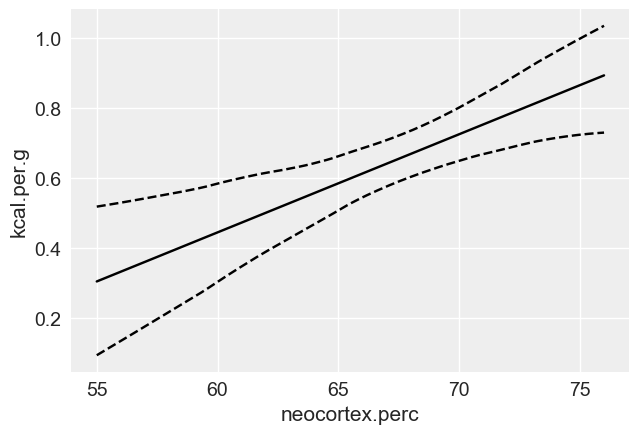

In [12]:
# 5.27
seq = np.linspace(55, 76, 50)
mu_pred = trace_5_7['a'] + trace_5_7['bn'][:,0] * seq[:,None] + trace_5_7['bn'][:,1] * dcc['log_mass'].mean()

plt.plot(seq, mu_pred.mean(1), 'k')
az.plot_hpd(seq, mu_pred.T,
            fill_kwargs={'alpha': 0},
            plot_kwargs={'alpha':1, 'color':'k', 'ls':'--'})

plt.xlabel('neocortex.perc')
plt.ylabel('kcal.per.g');

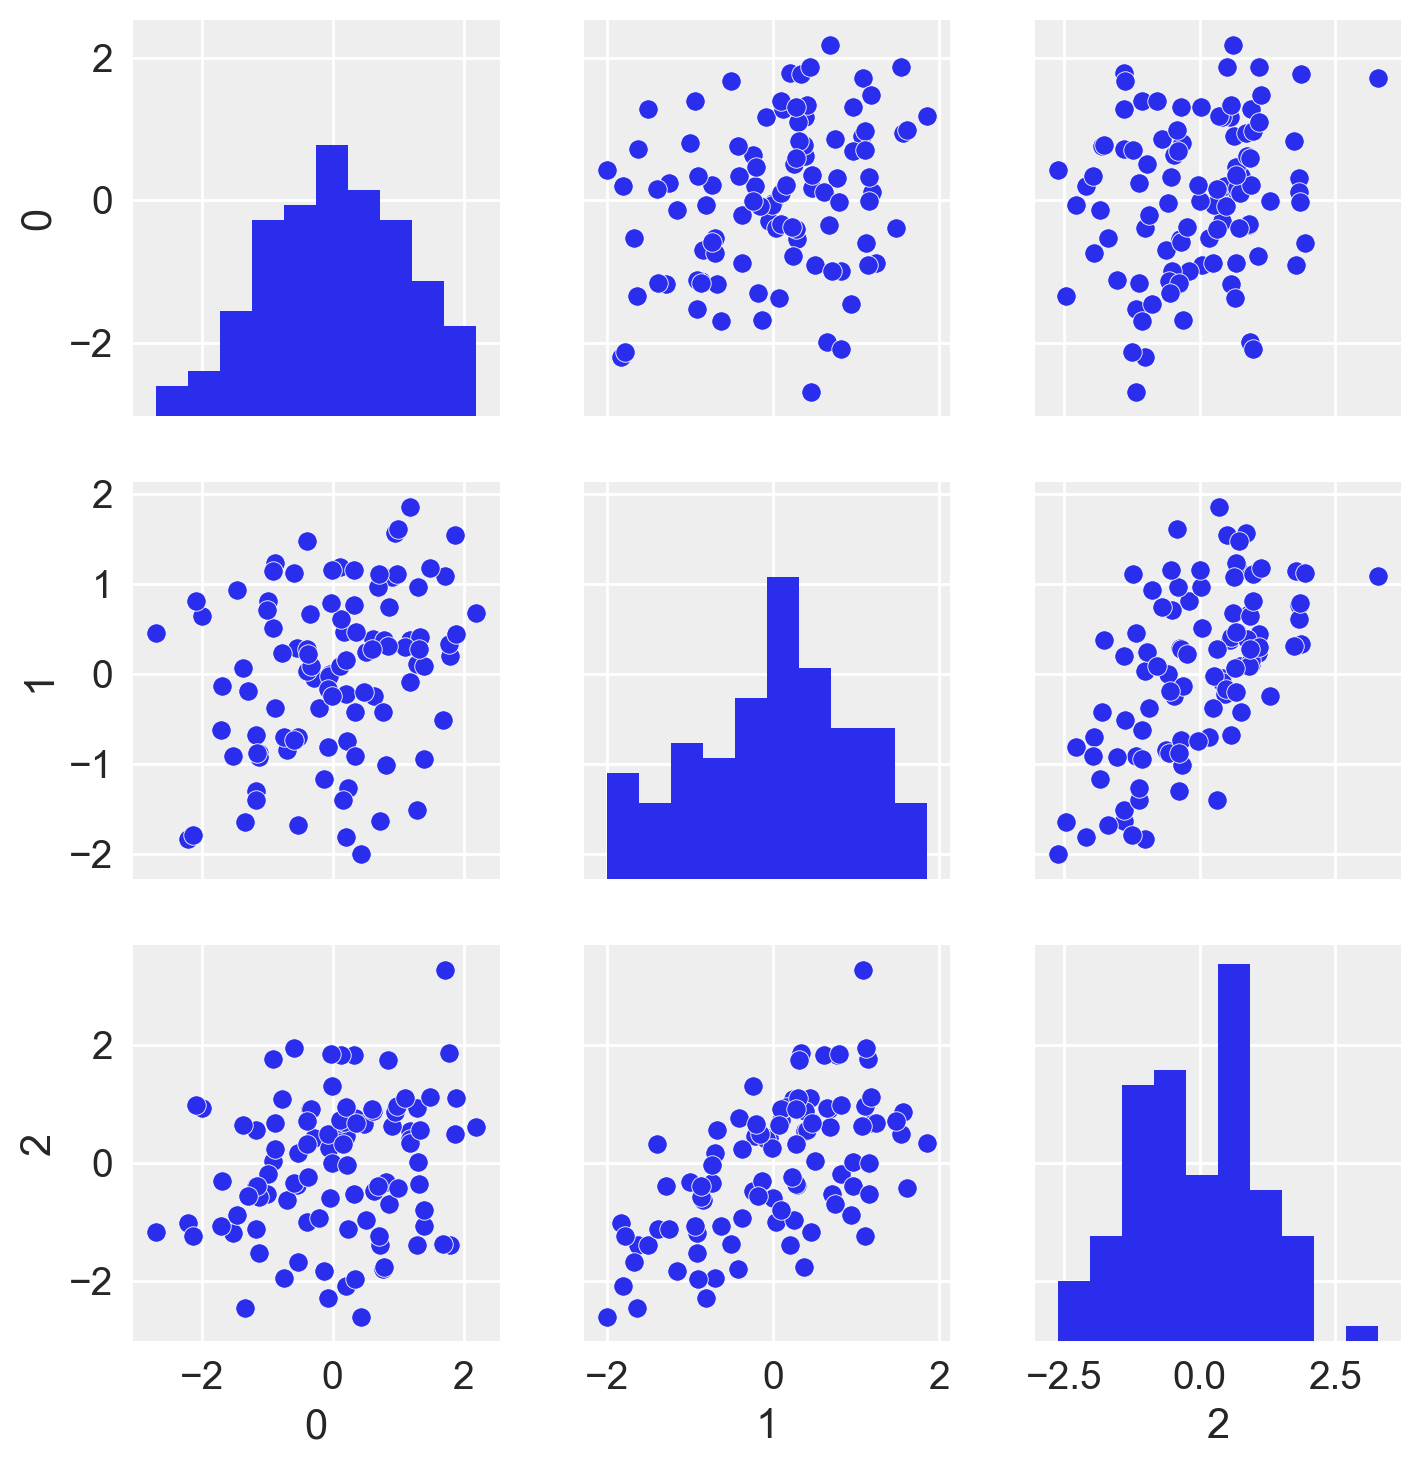

In [226]:
# 5.28
N = 100
rho = 0.7
x_pos = stats.norm.rvs(size = N)
x_neg = stats.norm.rvs(rho*x_pos, (1-rho**2)**5)
y = stats.norm.rvs(x_pos - x_neg)
d = pd.DataFrame([y, x_real, x_spur]).T

sns.pairplot(d);

In [228]:
# 5.29
N = 100
height = stats.norm.rvs(size = N, loc = 10, scale = 2)
leg_prop = stats.uniform.rvs(size = N, loc = 0.4, scale = 0.5)
leg_left = leg_prop * height + stats.norm.rvs(size = N, loc = 0, scale = 0.02)
leg_right = leg_prop * height + stats.norm.rvs(size = N, loc = 0, scale = 0.02)

In [230]:
# 5.30
with pm.Model() as m5_8:
    a = pm.Normal('a', mu = 10, sd = 100)
    bl = pm.Normal('bl', mu = 2, sd = 10)
    br = pm.Normal('br', mu = 2, sd = 10)
    mu = pm.Deterministic('mu', a + bl * leg_left + br * leg_right)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    height_p = pm.Normal('height_p', mu = mu, sd = sigma, observed = height)
    
    trace_5_8 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, br, bl, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [02:48<00:00, 47.55draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      5.332  0.565     4.450      6.236      0.012    0.008    2398.0   
bl    -2.106  4.014    -8.483      4.213      0.098    0.072    1682.0   
br     2.830  4.010    -3.606      9.095      0.098    0.071    1683.0   
sigma  1.594  0.117     1.412      1.780      0.002    0.002    2537.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      2398.0    2417.0    2160.0    1.0  
bl     1562.0    1682.0    2151.0    1.0  
br     1603.0    1684.0    2075.0    1.0  
sigma  2472.0    2550.0    2435.0    1.0

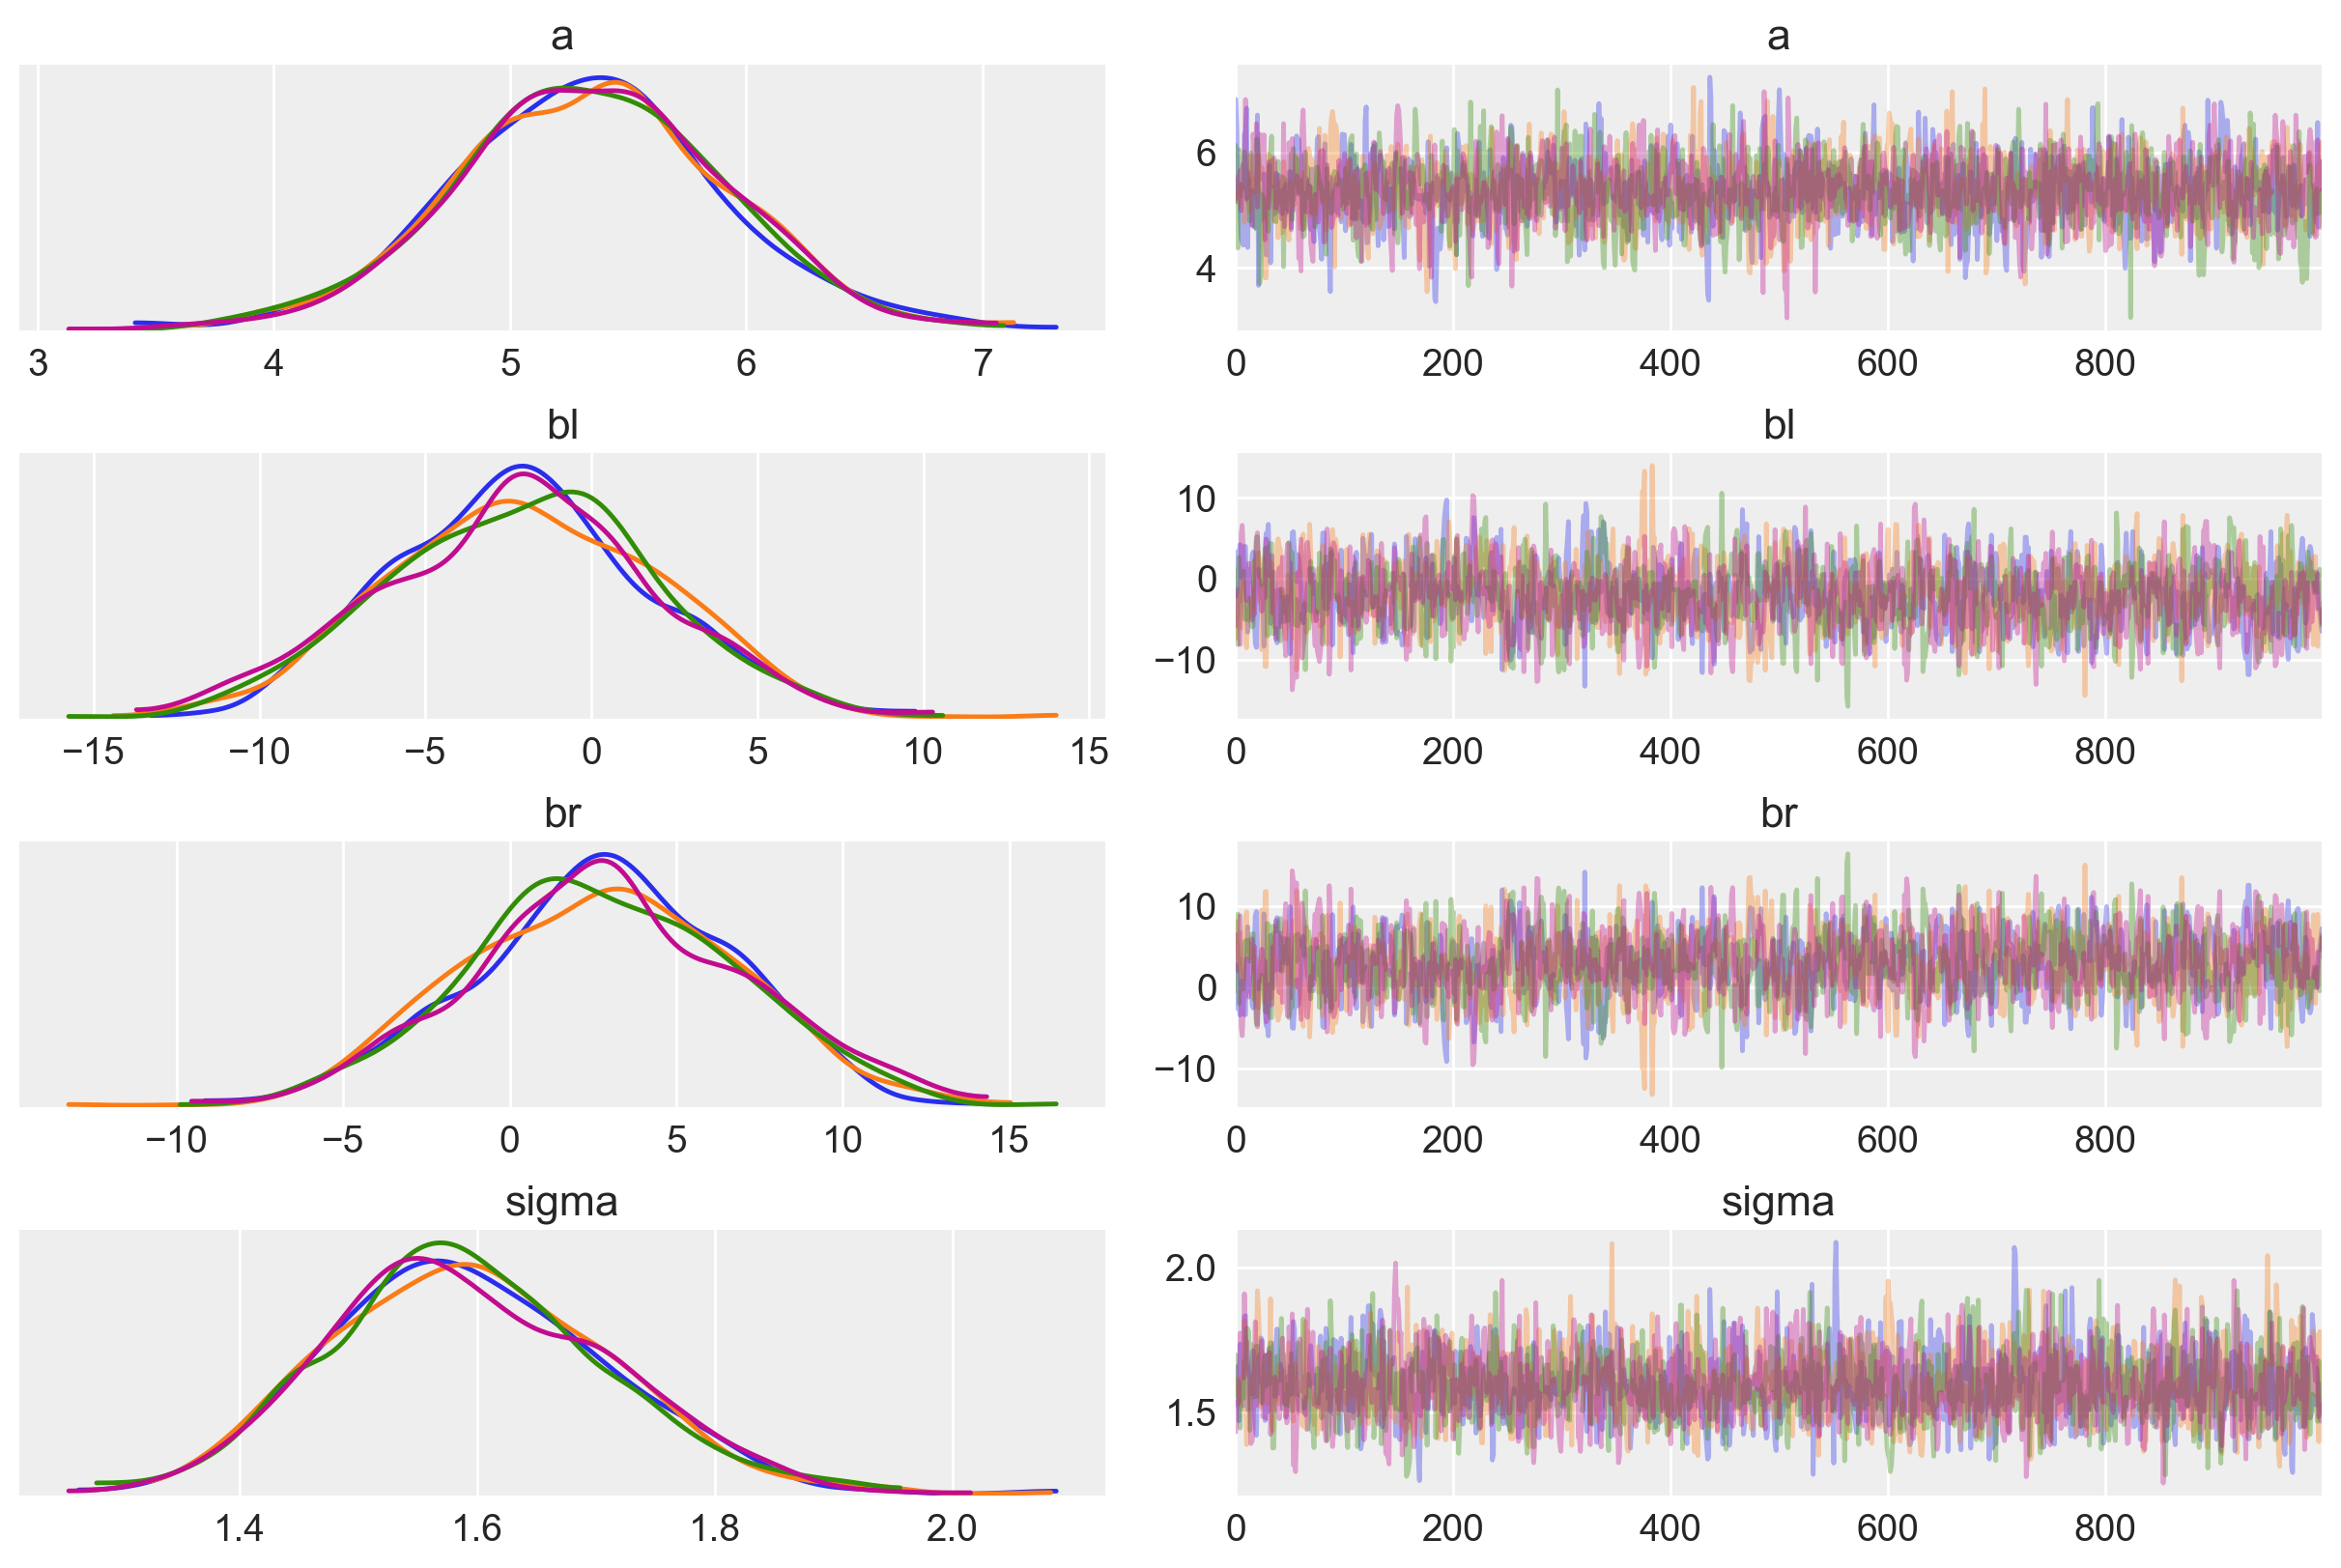

In [231]:
az.plot_trace(trace_5_8, varnames);
az.summary(trace_5_8, varnames, credible_interval=.89).round(3)

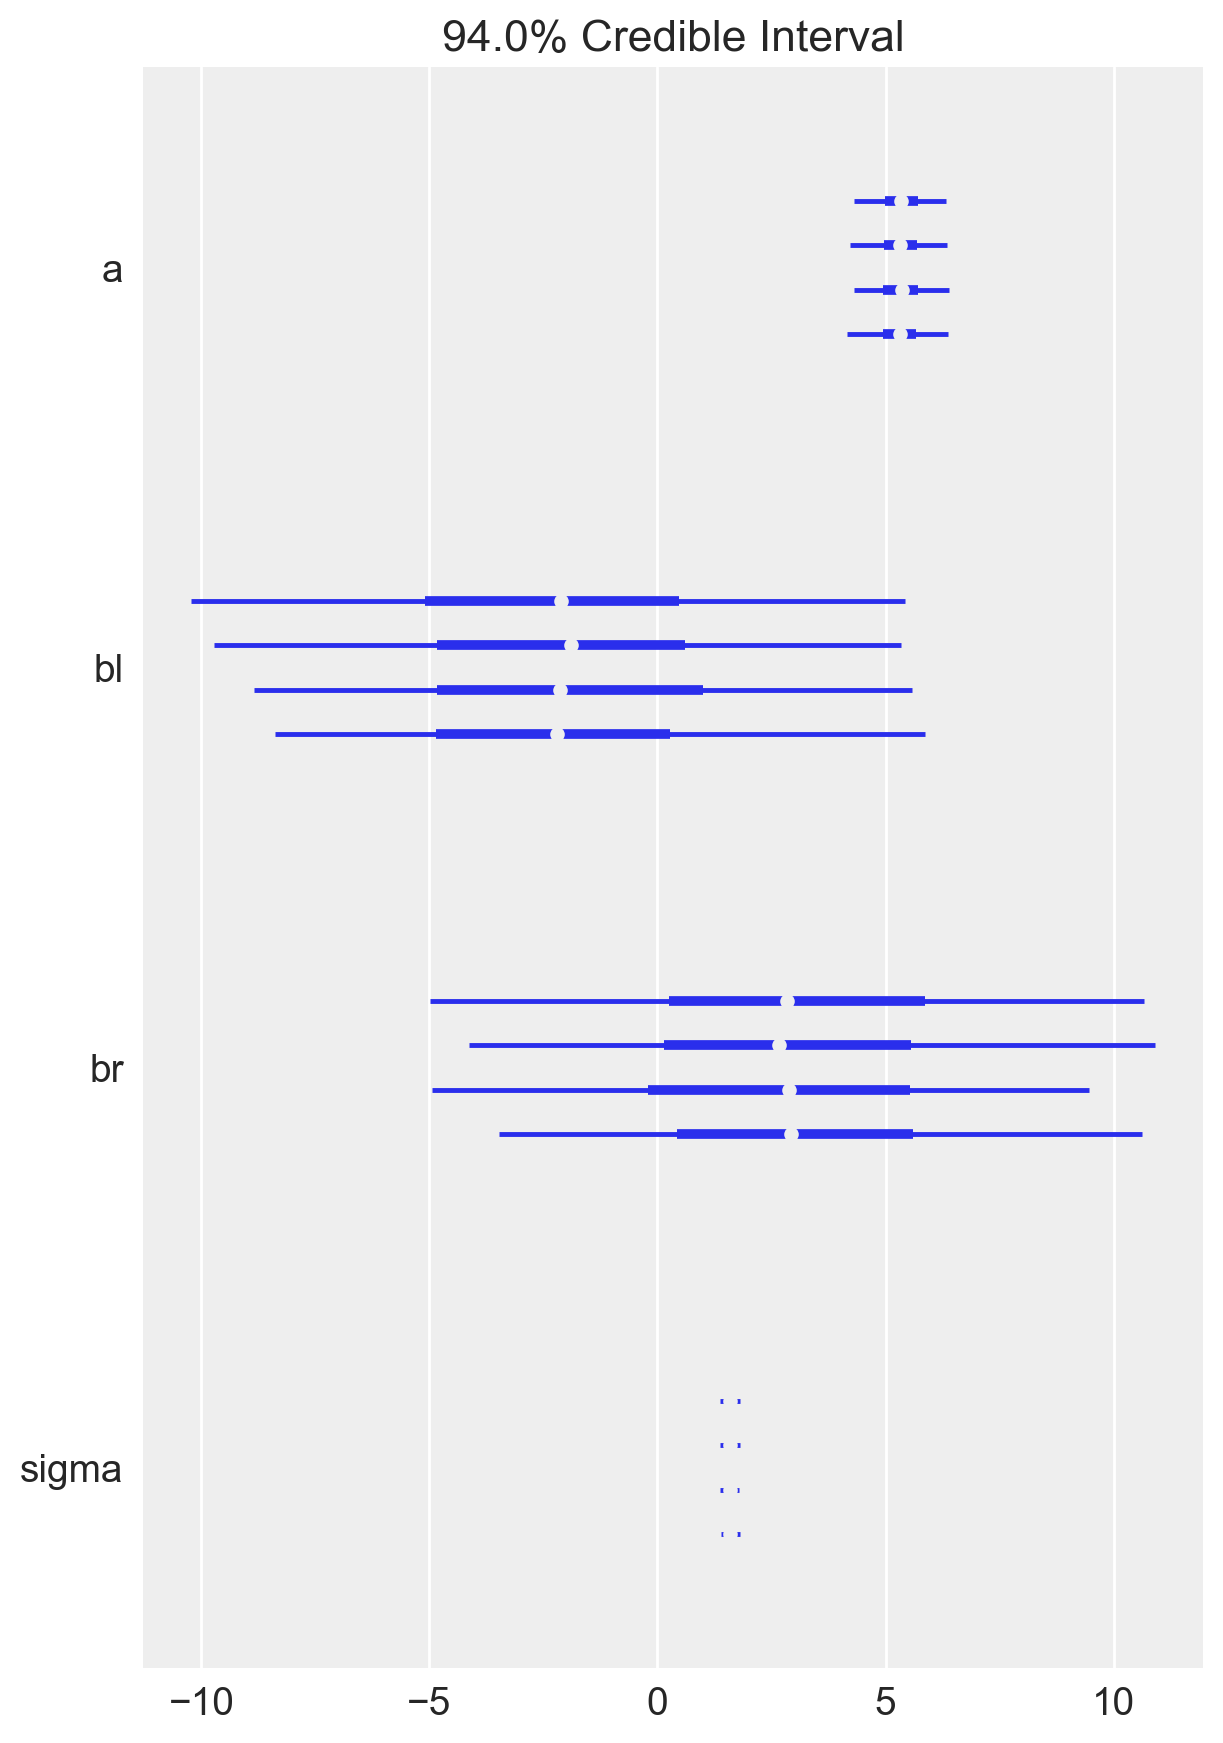

In [232]:
# 5.31
az.plot_forest(trace_5_8, var_names=varnames);

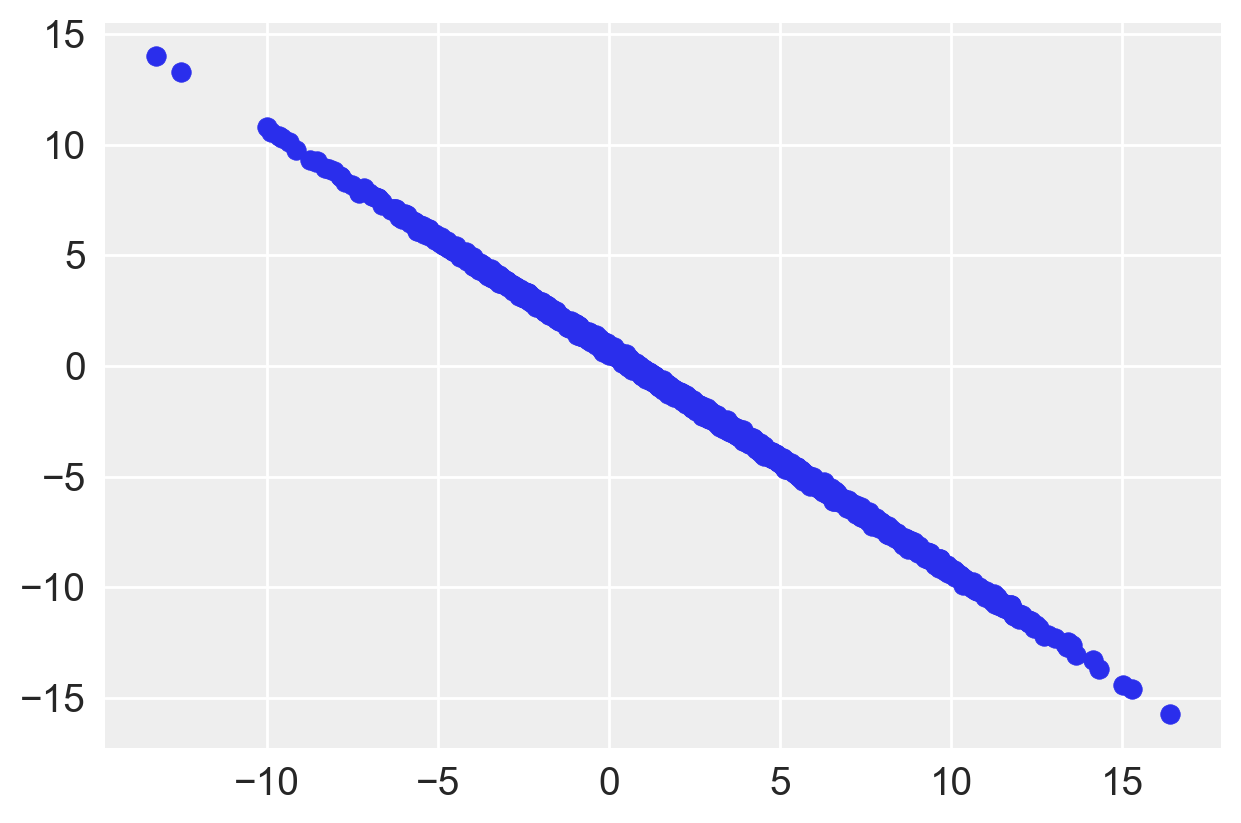

In [233]:
# 5.32
plt.scatter(trace_5_8['br'], trace_5_8['bl']);

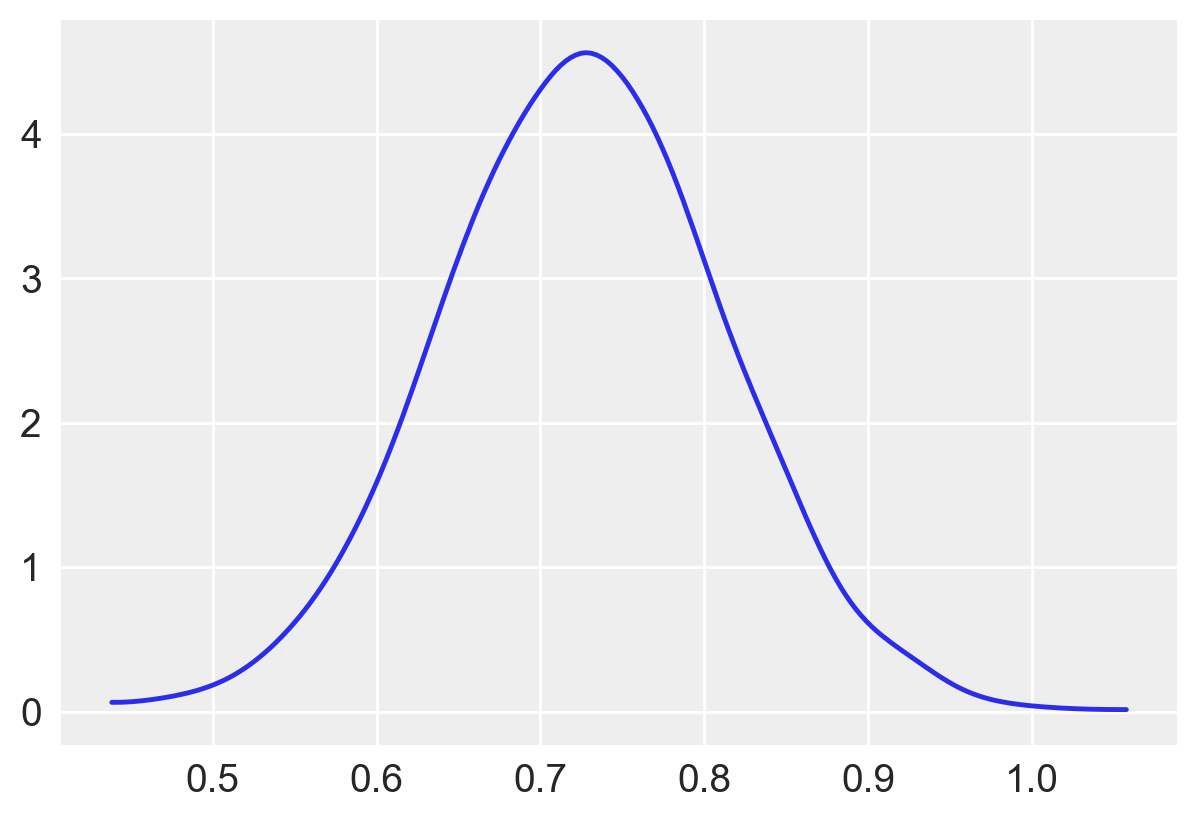

In [234]:
# 5.33
sum_blbr = trace_5_8['br'] + trace_5_8['bl']
az.plot_kde(sum_blbr);

In [237]:
with pm.Model() as m5_9:
    a = pm.Normal('a', mu = 10, sd = 100)
    bl = pm.Normal('bl', mu = 2, sd = 10)
    mu = pm.Deterministic('mu', a + bl * leg_left)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    height = pm.Normal('height', mu = mu, sd = sigma, observed = height)
    
    trace_5_9 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bl, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:04<00:00, 1689.91draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.6890720505956657, but should be close to 0.8. Try to increase th

In [238]:
#pm.traceplot(trace_5_9, varnames)
az.summary(trace_5_9, varnames, credible_interval=.11).round(3)

mean     sd  hpd_44.5%  hpd_55.5%  mcse_mean  mcse_sd  ess_mean  \
a      5.337  0.570      5.249      5.394      0.014    0.010    1637.0   
bl     0.724  0.086      0.704      0.727      0.002    0.001    1661.0   
sigma  1.592  0.115      1.536      1.563      0.003    0.002    1913.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1637.0    1641.0    1430.0    1.0  
bl     1646.0    1660.0    1560.0    1.0  
sigma  1913.0    1891.0     945.0    1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e5875c0>,
      dtype=object)

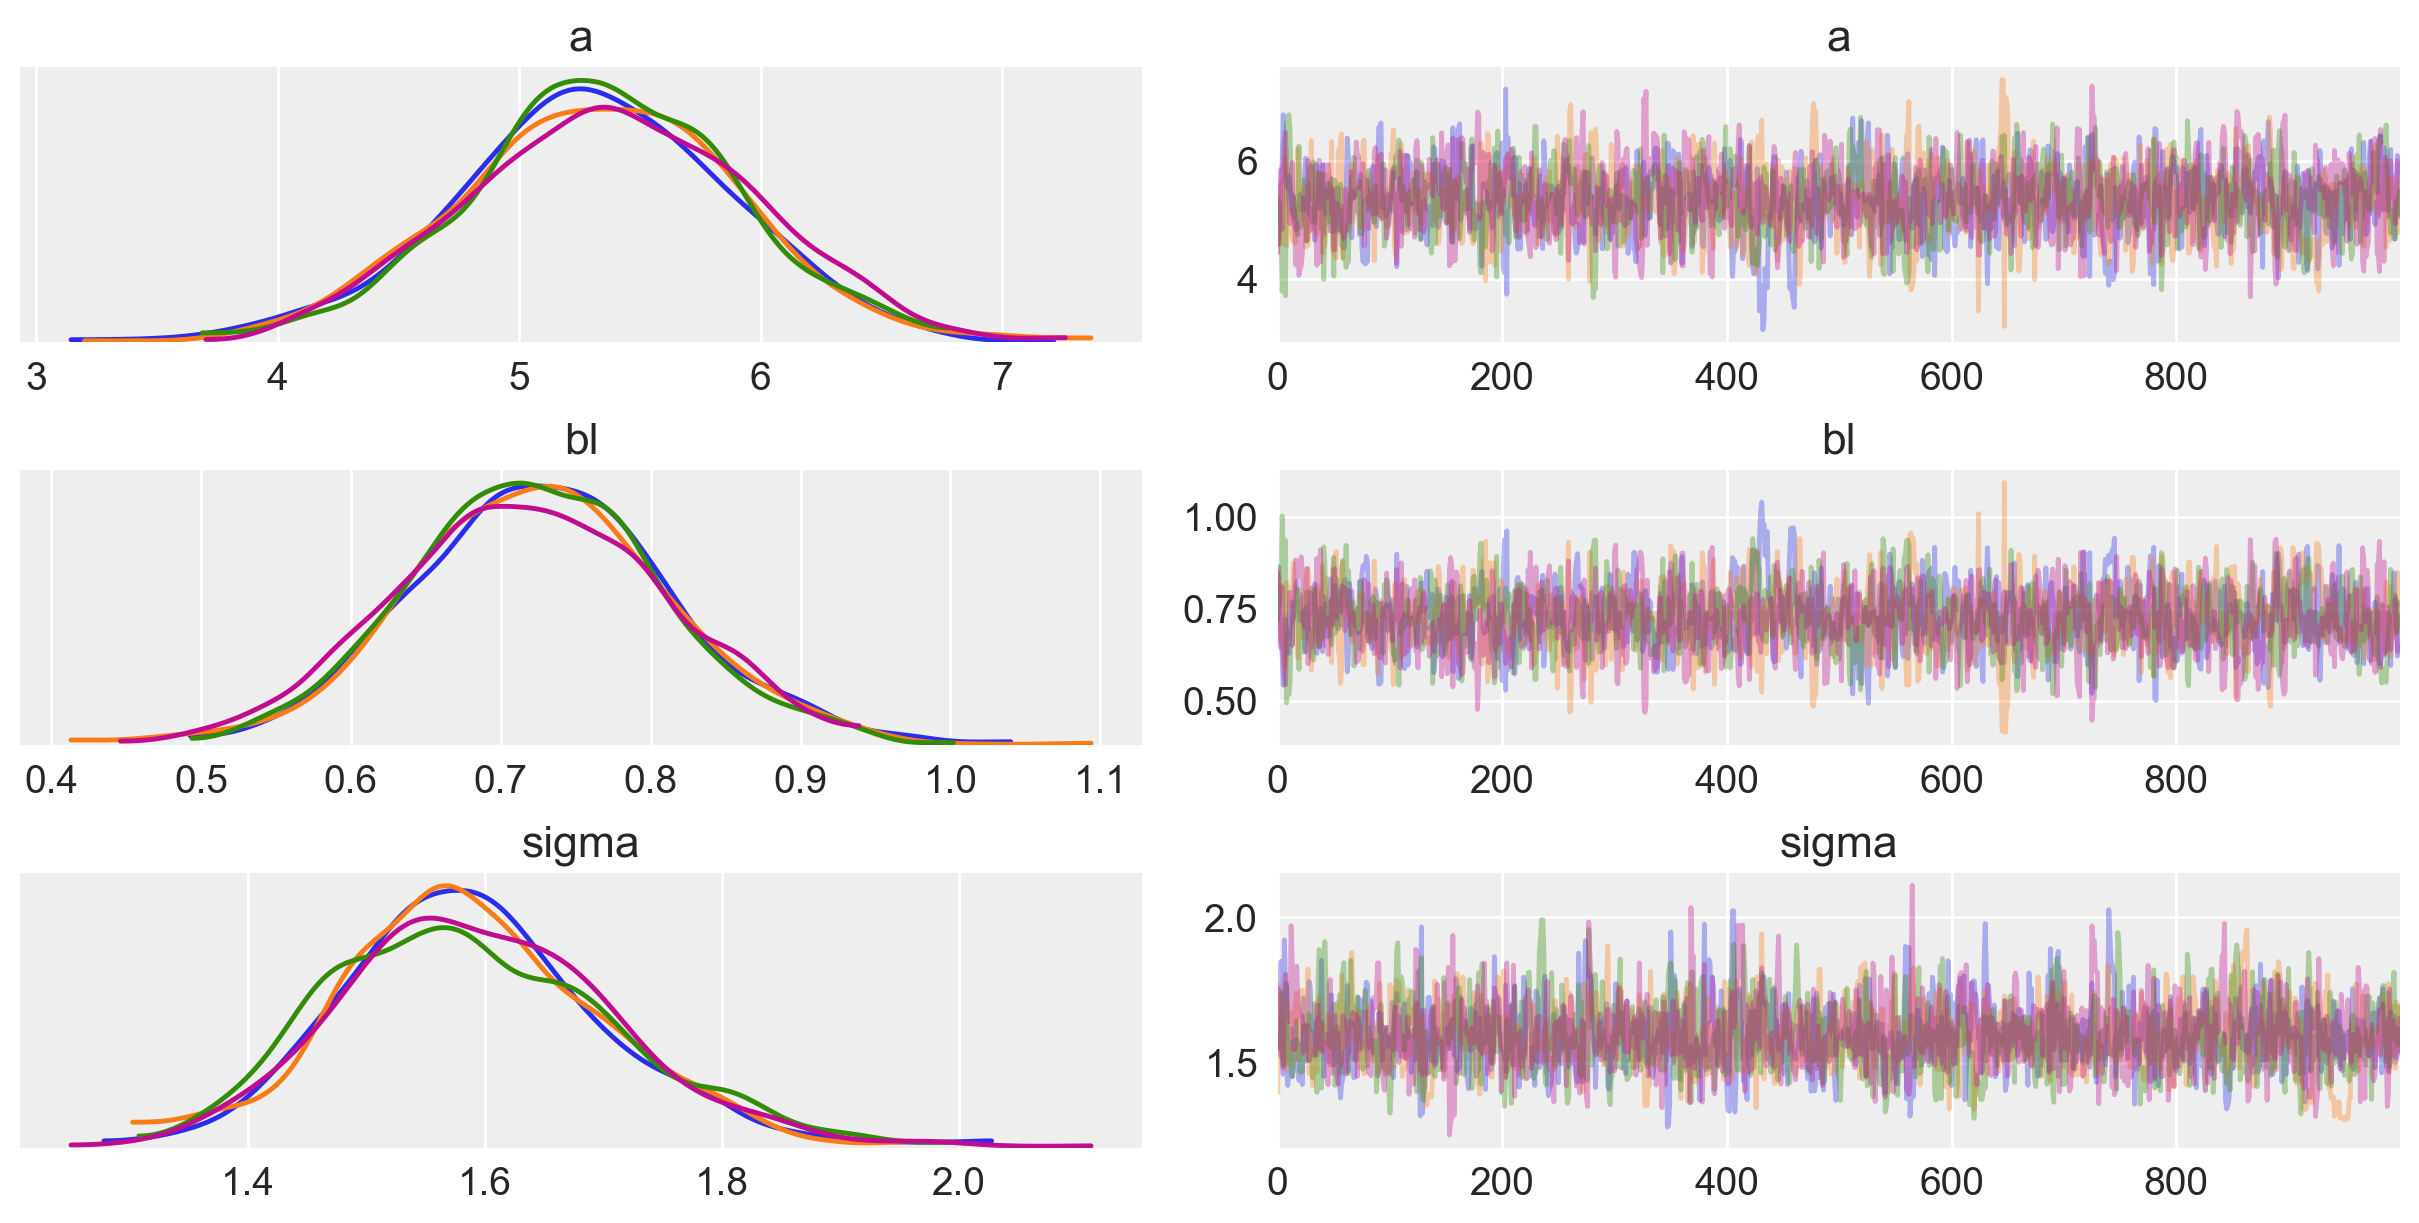

In [239]:
pm.traceplot(trace_5_9, varnames);

In [240]:
milk = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/milk.csv', sep=';')
milk.head()

clade         species  kcal.per.g  perc.fat  perc.protein  \
0  Strepsirrhine  Eulemur fulvus        0.49     16.60         15.42   
1  Strepsirrhine        E macaco        0.51     19.27         16.91   
2  Strepsirrhine        E mongoz        0.46     14.11         16.85   
3  Strepsirrhine   E rubriventer        0.48     14.91         13.18   
4  Strepsirrhine     Lemur catta        0.60     27.28         19.50   

   perc.lactose  mass  neocortex.perc  
0         67.98  1.95           55.16  
1         63.82  2.09             NaN  
2         69.04  2.51             NaN  
3         71.91  1.62             NaN  
4         53.22  2.19             NaN

In [242]:
# 5.36
with pm.Model() as m5_10:
    a = pm.Normal('a', mu = 0.6, sd = 10)
    bf = pm.Normal('bf', mu = 0, sd = 1)
    mu = pm.Deterministic('mu', a + bf * milk['perc.fat'])
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    kcalperg = pm.Normal('kcal.per.g', mu = mu, sd = sigma, observed = milk['kcal.per.g'])
    trace_5_10 = pm.sample(1000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bf, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1361.04draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [243]:
az.summary(trace_5_10, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      0.301  0.038     0.239      0.360      0.001    0.001    1607.0   
bf     0.010  0.001     0.008      0.012      0.000    0.000    1604.0   
sigma  0.079  0.012     0.061      0.096      0.000    0.000    1807.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1607.0    1637.0    1568.0    1.0  
bf     1571.0    1626.0    1771.0    1.0  
sigma  1749.0    1897.0    1679.0    1.0

In [244]:
with pm.Model() as m5_11:
    a = pm.Normal('a',mu = 0.6, sd=10)
    bl = pm.Normal('bl',mu=0, sd= 1)
    mu = pm.Deterministic('mu',a + bl * milk['perc.lactose'])    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcalperg = pm.Normal('kcal.per.g',mu=mu, sd=sigma, observed=milk['kcal.per.g'])
    trace_5_11 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bl, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:07<00:00, 1035.95draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.88436015932994, but should be close to 0.8. Try to increase the 

In [245]:
with pm.Model() as m5_12:
    a = pm.Normal('a',mu = 0.6, sd=10)
    bf = pm.Normal('bf',mu=0, sd= 1)
    bl = pm.Normal('bl',mu=0, sd= 1)
    mu = pm.Deterministic('mu',a + bf * milk['perc.fat'] + bl * milk['perc.lactose'])    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcalperg = pm.Normal('kcal.per.g',mu=mu, sd=sigma, observed=milk['kcal.per.g'])
    trace_5_12 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bl, bf, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:17<00:00, 448.21draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is small

In [246]:
az.summary(trace_5_12, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      0.987  0.234     0.613      1.352      0.008    0.006     880.0   
bf     0.002  0.003    -0.002      0.007      0.000    0.000     937.0   
bl    -0.008  0.003    -0.013     -0.004      0.000    0.000     881.0   
sigma  0.068  0.010     0.053      0.083      0.000    0.000    1299.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a       880.0     906.0    1102.0    1.0  
bf      918.0     950.0    1135.0    1.0  
bl      881.0     912.0    1095.0    1.0  
sigma  1296.0    1294.0    1179.0    1.0

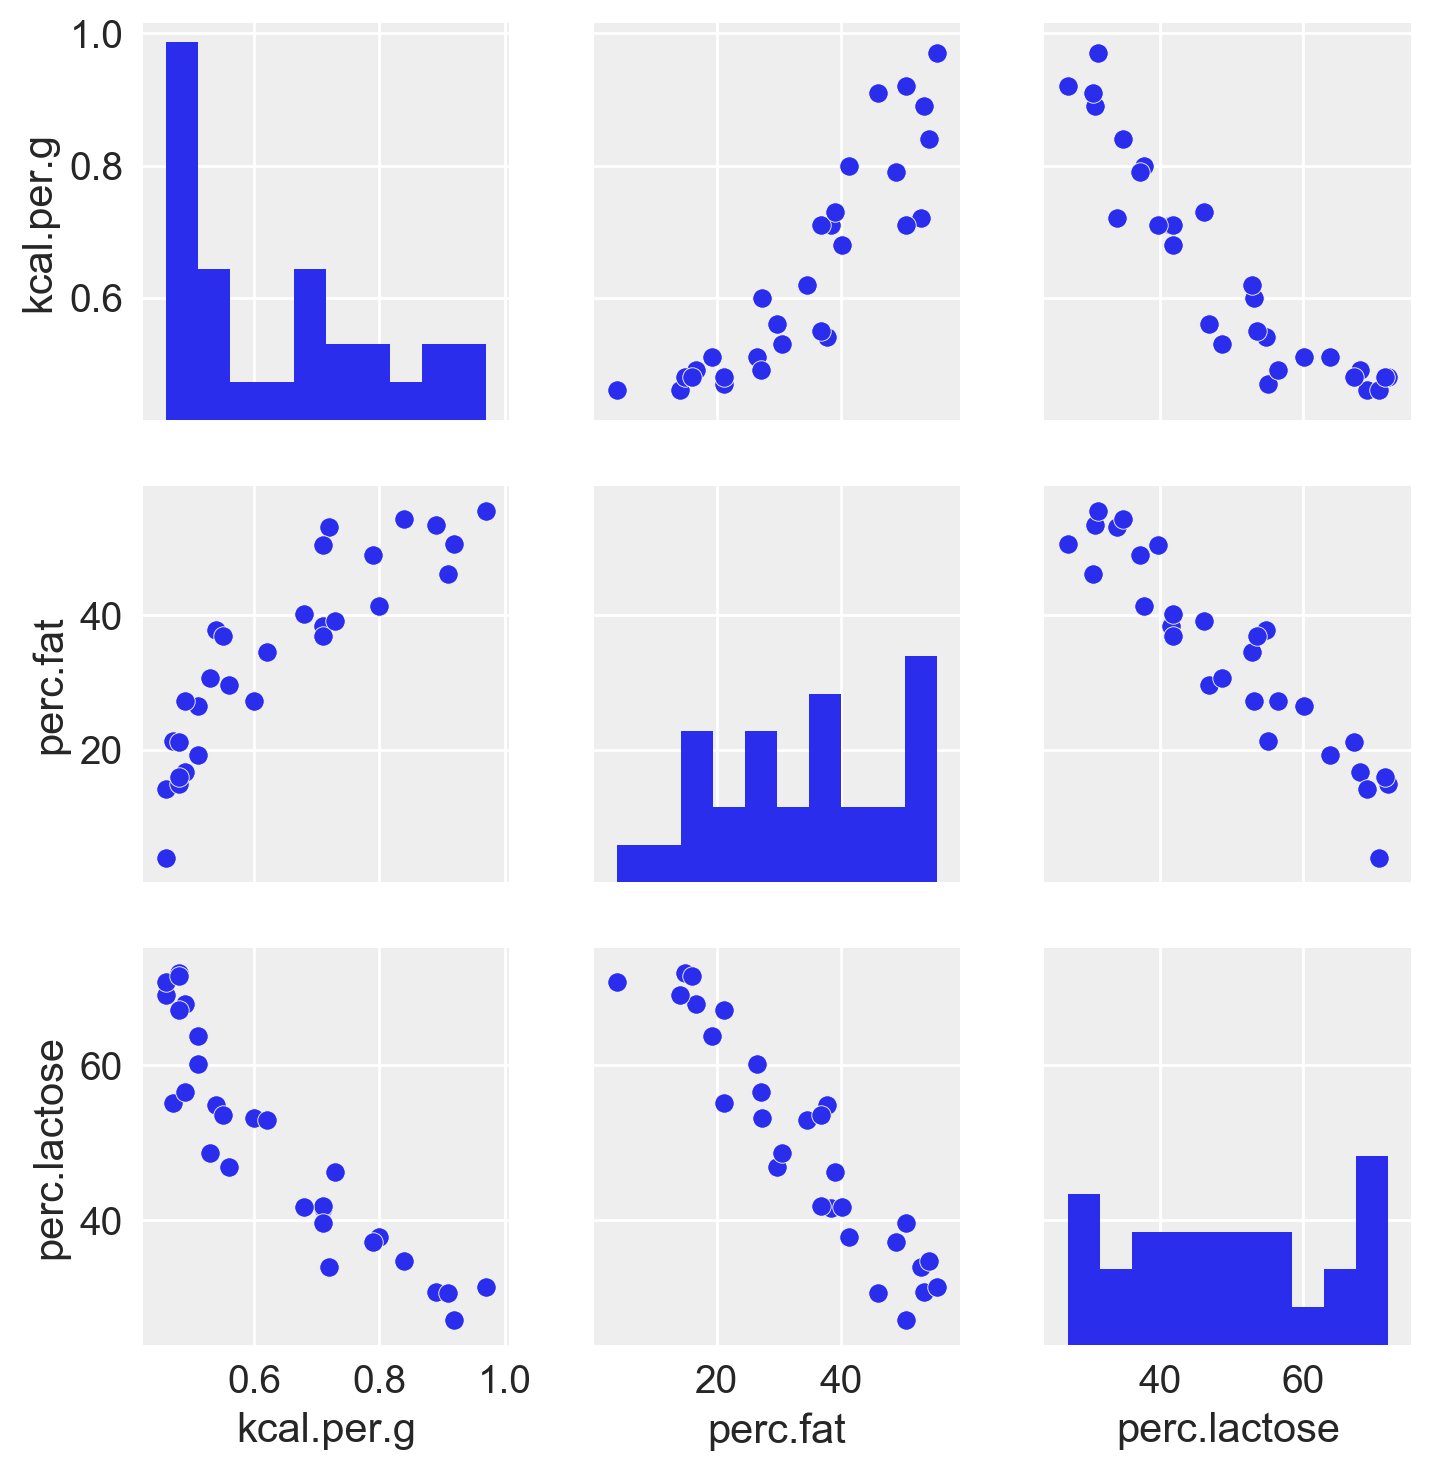

In [247]:
df = milk[['kcal.per.g','perc.fat','perc.lactose']]
sns.pairplot(df);

In [249]:
# 5.41
# number of plants
N = 100

# simulate initial heights
h0 = stats.norm.rvs(size = N, loc = 10, scale = 2)

# assign treatments and simulate fungus and growth
treatment = np.repeat([0, 1], [N/2]*2)
fungus = np.random.binomial(n=1, p=(0.5-treatment * 0.4), size=N)
h1 = h0 + stats.norm.rvs(size= N, loc= 5- 3*fungus, scale=1)

# compose a clean data frame
d = pd.DataFrame({'h0': h0,
                  'h1': h1,
                  'Treatment':treatment,
                  'Fungus': fungus})

In [262]:
with pm.Model() as m5_13:
    a = pm.Normal('a',mu = 0, sd=100)
    bh = pm.Normal('bh',mu = 0, sd=10)
    bt = pm.Normal('bt',mu = 0, sd=10)
    bf = pm.Normal('bf',mu = 0, sd=10)
    mu = pm.Deterministic('mu',a + bh * h0 + bt * treatment + bf * fungus)
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    h1 = pm.Normal('h1', mu = mu, sd=sigma, observed = d['h1'].get_values())
    trace_5_13 = pm.sample(1000, tune=1000) 

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bf, bt, bh, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:08<00:00, 892.73draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it w

In [263]:
az.summary(trace_5_13, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      4.294  0.612     3.375      5.318      0.014    0.010    1865.0   
bh     1.076  0.058     0.987      1.170      0.001    0.001    1925.0   
bt     0.061  0.241    -0.314      0.449      0.005    0.004    2670.0   
bf    -3.405  0.272    -3.857     -3.000      0.006    0.004    2001.0   
sigma  1.126  0.084     0.994      1.260      0.002    0.001    2869.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1865.0    1866.0    2108.0    1.0  
bh     1921.0    1929.0    2184.0    1.0  
bt     2279.0    2675.0    2746.0    1.0  
bf     1994.0    1996.0    2211.0    1.0  
sigma  2807.0    2939.0    2420.0    1.0

In [264]:
with pm.Model() as m5_14:
    a = pm.Normal('a',mu = 0, sd=100)
    bh = pm.Normal('bh',mu = 0, sd=10)
    bt = pm.Normal('bt',mu = 0, sd=10)
    mu = pm.Deterministic('mu',a + bh * h0 + bt * treatment)
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    h1 = pm.Normal('h1', mu = mu, sd=sigma, observed =d['h1'])
    trace_5_14 = pm.sample(1000, tune=1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bt, bh, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:08<00:00, 899.79draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [265]:
az.summary(trace_5_14, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      3.194  1.020     1.436      4.709      0.025    0.018    1716.0   
bh     1.043  0.096     0.891      1.195      0.002    0.002    1755.0   
bt     1.077  0.361     0.534      1.697      0.007    0.005    2728.0   
sigma  1.843  0.135     1.635      2.054      0.003    0.002    2589.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1637.0    1731.0    1720.0    1.0  
bh     1755.0    1773.0    1831.0    1.0  
bt     2728.0    2720.0    2641.0    1.0  
sigma  2551.0    2649.0    2246.0    1.0

In [267]:
d = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/Howell1.csv', sep=';')
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

In [268]:
with pm.Model() as m5_15:
    a = pm.Normal('a',mu = 178, sd=100)
    bm = pm.Normal('bm',mu = 0, sd=10)
    mu = pm.Deterministic('mu',a + bm * d['male'])
    sigma = pm.Uniform('sigma', lower= 0 , upper= 50)
    height = pm.Normal('height', mu = mu, sd=sigma, observed = d['height'])
    trace_5_15 = pm.sample(1000, tune=1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bm, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2492.52draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [269]:
az.summary(trace_5_15, varnames, credible_interval=.89).round(3)

mean     sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a      134.820  1.581   132.222    137.327      0.037    0.026    1875.0   
bm       7.292  2.279     3.744     11.036      0.052    0.036    1951.0   
sigma   27.421  0.834    26.071     28.691      0.014    0.010    3489.0   

       ess_sd  ess_bulk  ess_tail  r_hat  
a      1875.0    1880.0    2727.0    1.0  
bm     1951.0    1956.0    2268.0    1.0  
sigma  3445.0    3525.0    2582.0    1.0

In [271]:
d = pd.read_csv('/Users/benjaminwee/Documents/courses/resources/Rethinking/Data/milk.csv', sep=';')
d = d.drop_duplicates()

In [272]:
d['clade.NWM'] = np.where( d['clade'] == 'New World Monkey', 1, 0)
d['clade.NWM'].get_values()
d['clade.OWM'] = np.where( d['clade'] == 'Old World Monkey', 1, 0)
d['clade.S'] = np.where( d['clade'] == 'Strepsirrhine', 1, 0)

/Users/benjaminwee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


In [273]:
with pm.Model() as m5_16:
    a = pm.Normal('a', mu = 0.6, sd=10)
    b_NWM = pm.Normal('b_NWM',mu = 0, sd=1)
    b_OWM = pm.Normal('b_OWM',mu = 0, sd=1)
    b_S = pm.Normal('b_S',mu = 0, sd=1)
    mu = pm.Deterministic('mu', a + 
                          b_NWM * d['clade.NWM'] + 
                          b_OWM * d['clade.OWM'] +
                          b_S * d['clade.S'])
    
    # instead of adding this as a deterministic when running the model 
    # it is possible to add them, after sampling using something like this
    # trace_5_16.add_values({'mu_NWM', trace_5_16[a] + trace_5_16['b_NWM']})
    mu_ape = pm.Deterministic('mu_ape', a + 0)
    mu_NWM = pm.Deterministic('mu_NWM', a + b_NWM)
    mu_OWM = pm.Deterministic('mu_OWM', a + b_OWM)
    mu_S =  pm.Deterministic('mu_S', a + b_S)
    
    sigma = pm.Uniform('sigma', lower= 0 , upper= 10)
    kcal_per_g = pm.Normal('kcal_per_g', mu = mu, sd=sigma, observed = d['kcal.per.g'])
    trace_5_16 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_S, b_OWM, b_NWM, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:03<00:00, 2416.04draws/s]
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/benjaminwee/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [274]:
varnames = ['mu_ape', 'mu_NWM', 'b_OWM', 'b_S']
az.summary(trace_5_16, varnames, credible_interval=.89).round(3)[['mean', 'sd', 'hpd_5.5%', 'hpd_94.5%']]

mean     sd  hpd_5.5%  hpd_94.5%
mu_ape  0.546  0.044     0.478      0.614
mu_NWM  0.715  0.044     0.640      0.780
b_OWM   0.243  0.069     0.140      0.358
b_S    -0.038  0.072    -0.150      0.078

In [275]:
diff_NMW_OWM = trace_5_16['mu_NWM'] - trace_5_16['mu_OWM']
np.percentile(diff_NMW_OWM, 2.5), np.percentile(diff_NMW_OWM, 50), np.percentile(diff_NMW_OWM, 97.5)

(-0.21427289000401428, -0.07277430867069978, 0.06363666049252897)

In [276]:
z = pd.Categorical(d['clade'])
d['clade_id'] = z.codes